<a href="https://colab.research.google.com/github/maxmigue/TallerDataScience/blob/main/ProyectoU1_TDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📝**Unidad 1 - Producto Computacional**
##**Preprocesamiento de datos en dataset MHEALTH (Mobile Health Dataset for Activity Recognition)**🏥
###Miguel Contardo Ramos

---
#🔎Carga de datos y Exploración inicial
Primero, se cargan los datos en formato .log, donde cada linea son lecturas de los distintos sensores empleados.
Las señales (cada fila) es medida en una frecuencia de 50Hz, es decir, entre filas hay una diferencia de 0.02 segundos.
Se presentan 10 archivos para 10 personas respectivamente, donde, para cada individuo, se miden distintas variables para la realización de distintas actividades, las cuales se especifican como un campo extra "label".
Las distintas actividades y sensores se detallan a continuación:

Actividades:
- L1: De pie, quieto (1 min)
- L2: Sentado y relajado (1 min)
- L3: Acostado (1 min)
- L4: Caminando (1 min)
- L5: Subiendo escaleras (1 min)
- L6: Inclinaciones de cintura hacia adelante (20 veces)
- L7: Elevación frontal de brazos (20 veces)
- L8: Flexión de rodillas (sentadillas) (20 veces)
- L9: Andar en bicicleta (1 min)
- L10: Trote (1 min)
- L11: Corriendo (1 min)
- L12: Saltar hacia adelante y hacia atrás (20 veces)

Atributos:
- Columna 1: aceleración del sensor en el pecho (eje X)
- Columna 2: aceleración del sensor en el pecho (eje Y)
- Columna 3: aceleración del sensor en el pecho (eje Z)
- Columna 4: señal de electrocardiograma (derivación 1)
- Columna 5: señal de electrocardiograma (derivación 2)
- Columna 6: aceleración del sensor en el tobillo izquierdo (eje X)
- Columna 7: aceleración del sensor en el tobillo izquierdo (eje Y)
- Columna 8: aceleración del sensor en el tobillo izquierdo (eje Z)
- Columna 9: giroscopio del sensor en el tobillo izquierdo (eje X)
- Columna 10: giroscopio del sensor en el tobillo izquierdo (eje Y)
- Columna 11: giroscopio del sensor en el tobillo izquierdo (eje Z)
- Columna 12: magnetómetro del sensor en el tobillo izquierdo (eje X)
- Columna 13: magnetómetro del sensor en el tobillo izquierdo (eje Y)
- Columna 14: magnetómetro del sensor en el tobillo izquierdo (eje Z)
- Columna 15: aceleración del sensor en el antebrazo derecho (eje X)
- Columna 16: aceleración del sensor en el antebrazo derecho (eje Y)
- Columna 17: aceleración del sensor en el antebrazo derecho (eje Z)
- Columna 18: giroscopio del sensor en el antebrazo derecho (eje X)
- Columna 19: giroscopio del sensor en el antebrazo derecho (eje Y)
- Columna 20: giroscopio del sensor en el antebrazo derecho (eje Z)
- Columna 21: magnetómetro del sensor en el antebrazo derecho (eje X)
- Columna 22: magnetómetro del sensor en el antebrazo derecho (eje Y)
- Columna 23: magnetómetro del sensor en el antebrazo derecho (eje Z)
- Columna 24: label (0 para la clase nula)

Para este caso, se omitirán aquellas lecturas donde la actividad sea igual a 0 (nula).


   chest_acc_x  chest_acc_y  chest_acc_z     ecg_1     ecg_2  ankle_acc_x  \
0      -9.7788      0.55690      1.19750  0.008373 -0.033490       2.6493   
1      -9.7733      0.27880      0.73036 -0.025118 -0.025118       2.4157   
2      -9.8609      0.11561      0.79988  0.025118  0.016745       2.3865   
3      -9.7409      0.17652      0.88957  0.180010  0.129770       2.3758   
4      -9.7821      0.21637      0.90368  0.092098  0.046049       2.3239   

   ankle_acc_y  ankle_acc_z  ankle_gyro_x  ankle_gyro_y  ...  arm_acc_y  \
0      -9.4517      0.37683      -0.20965      -0.88931  ...    -9.0618   
1      -9.5306      0.40179      -0.20965      -0.88931  ...    -9.2048   
2      -9.5991      0.48141      -0.20037      -0.86867  ...    -9.1945   
3      -9.5997      0.42919      -0.20037      -0.86867  ...    -9.1746   
4      -9.5406      0.40038      -0.20037      -0.86867  ...    -9.2039   

   arm_acc_z  arm_gyro_x  arm_gyro_y  arm_gyro_z  arm_mag_x  arm_mag_y  \
0     1.8177

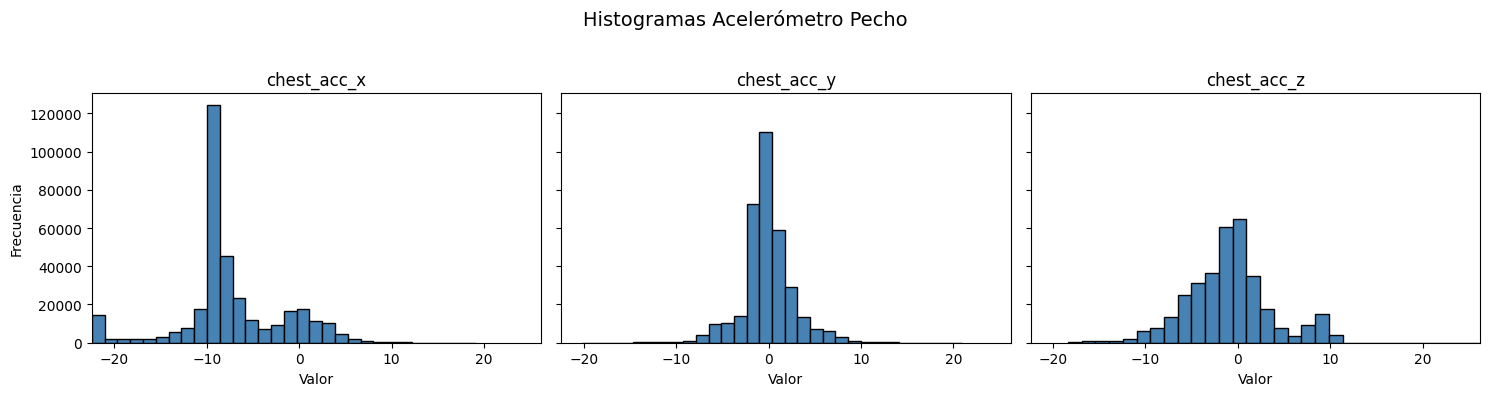

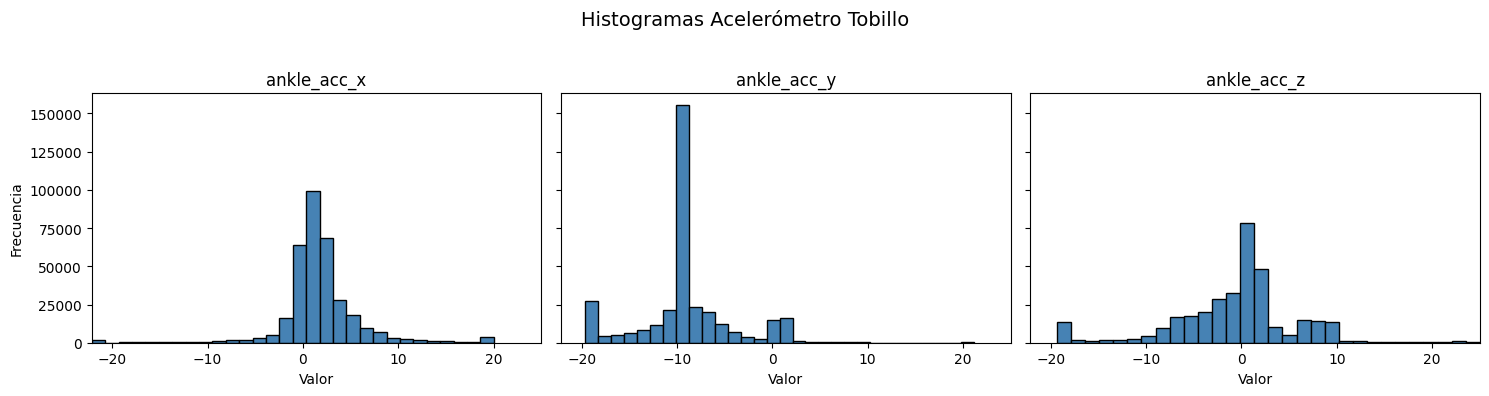

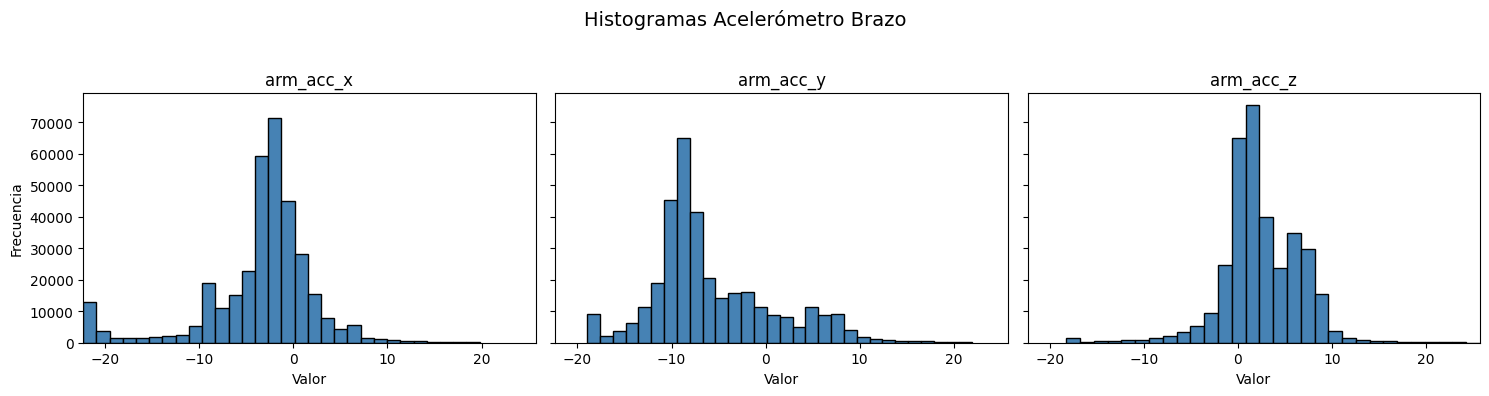

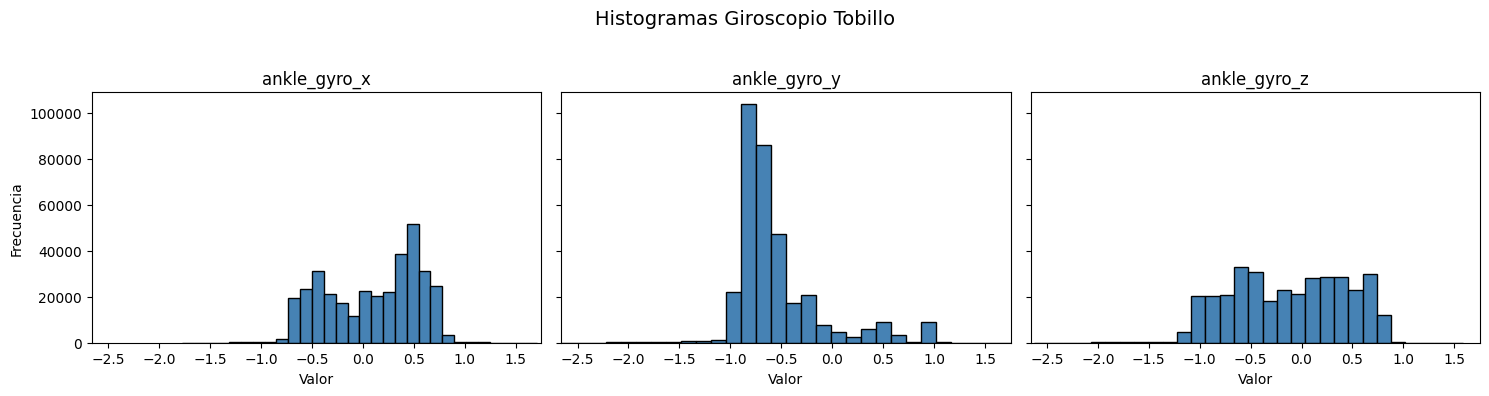

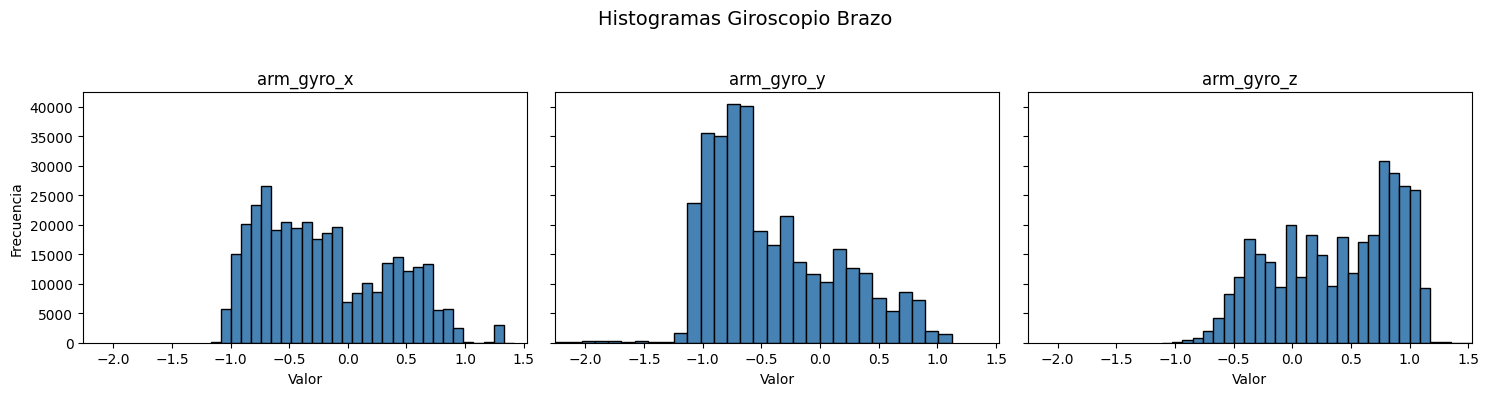

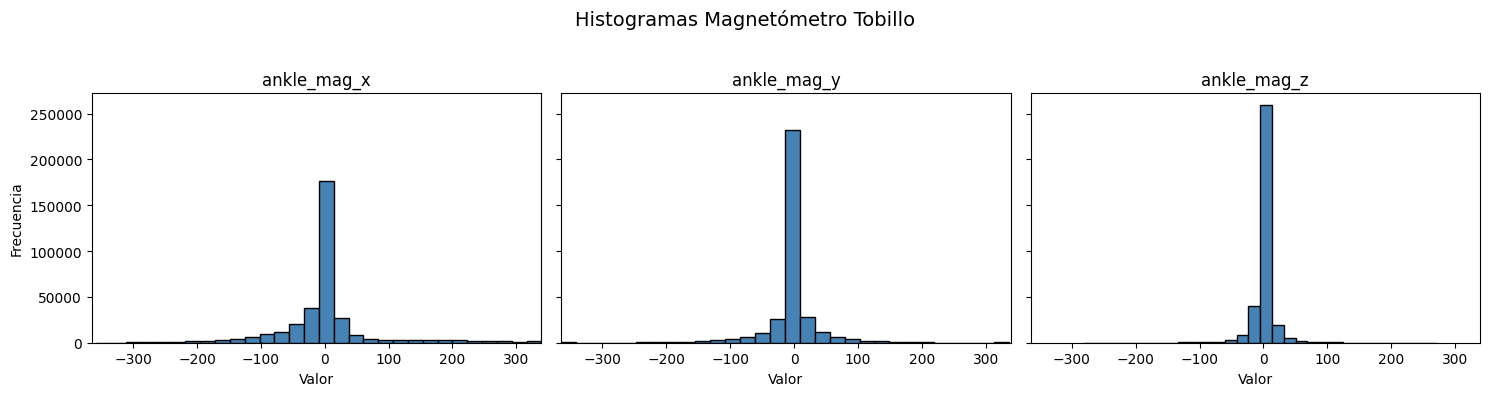

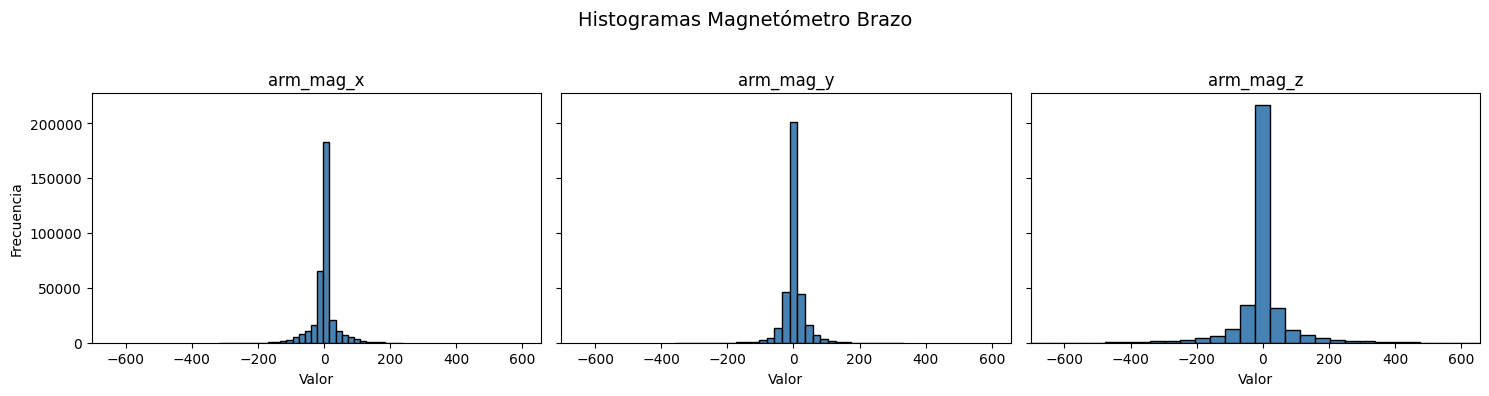

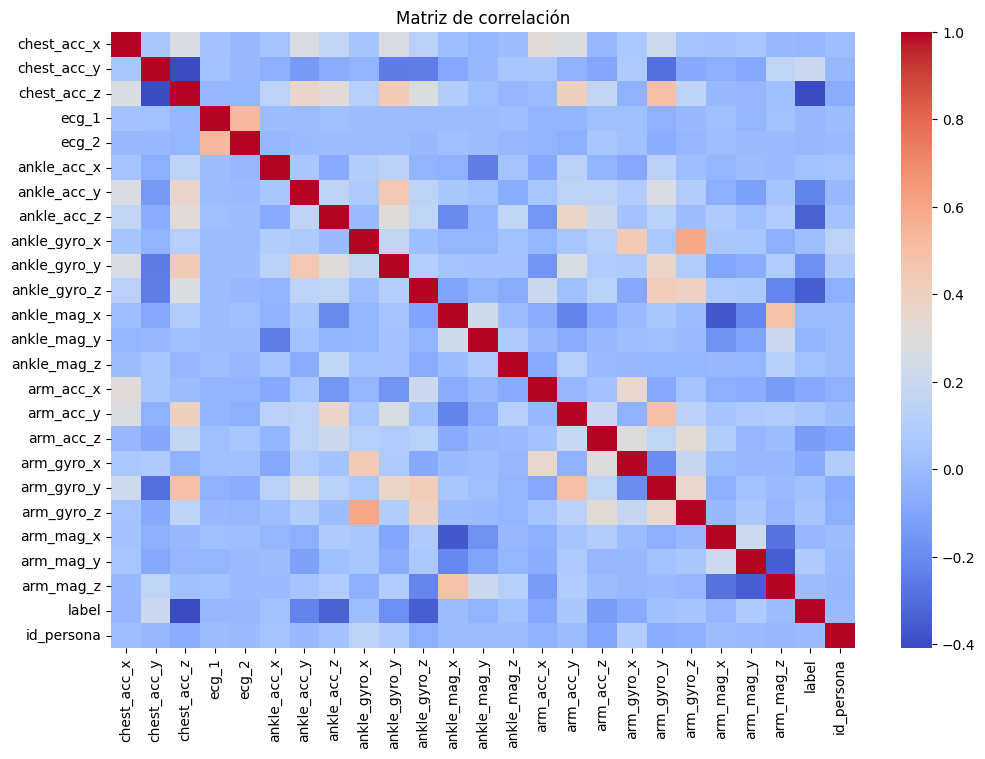

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re

# Ruta del archivo .log
ruta_base = "/content/drive/MyDrive/Utal/TALLER CIENCIA DE DATOS/Proyectos/Unidad 1/MHEALTH DATASET/*.log"

# Definir nombres de columnas
columnas = [
    "chest_acc_x", "chest_acc_y", "chest_acc_z",
    "ecg_1", "ecg_2",
    "ankle_acc_x", "ankle_acc_y", "ankle_acc_z",
    "ankle_gyro_x", "ankle_gyro_y", "ankle_gyro_z",
    "ankle_mag_x", "ankle_mag_y", "ankle_mag_z",
    "arm_acc_x", "arm_acc_y", "arm_acc_z",
    "arm_gyro_x", "arm_gyro_y", "arm_gyro_z",
    "arm_mag_x", "arm_mag_y", "arm_mag_z",
    "label"
]

# Lista para almacenar los DataFrames
dfs = []

# Iterar sobre todos los archivos
for ruta in glob.glob(ruta_base):
    # Extraer el id_persona con regex (ej: "mHealth_subject1.log" -> 1)
    match = re.search(r"subject(\d+)", ruta)
    if match:
        id_persona = int(match.group(1))
    else:
        id_persona = None

    # Leer archivo
    df_temp = pd.read_csv(ruta, sep=r"\s+", header=None, names=columnas)

    # Almacenar solo filas donde label != 0
    df_temp = df_temp[df_temp["label"] != 0]

    # Agregar columna id_persona
    df_temp["id_persona"] = id_persona

    # Guardar en lista
    dfs.append(df_temp)

# Concatenar todo en un único DataFrame
df = pd.concat(dfs, ignore_index=True)

# Guardar en un archivo CSV
df.to_csv("/content/drive/MyDrive/Utal/TALLER CIENCIA DE DATOS/Proyectos/Unidad 1/datos_filtrados.csv", index=False)

# Ver primeros datos
print(df.head())
print("Total de filas:", len(df))
print("Personas únicas:", df["id_persona"].nunique())

# Revisar si existen filas duplicadas (todas las columnas iguales)
duplicados = df.duplicated()
print("Cantidad de filas duplicadas:", duplicados.sum())

# Ver tipo de variables
print(df.dtypes)

print("\n--- Medidas estadísticas ---")
print(df.describe())

import matplotlib.pyplot as plt

# --- Definir grupos de sensores ---
grupos_sensores = {
    "Acelerómetro Pecho": ["chest_acc_x", "chest_acc_y", "chest_acc_z"],
    "Acelerómetro Tobillo": ["ankle_acc_x", "ankle_acc_y", "ankle_acc_z"],
    "Acelerómetro Brazo": ["arm_acc_x", "arm_acc_y", "arm_acc_z"],
    "Giroscopio Tobillo": ["ankle_gyro_x", "ankle_gyro_y", "ankle_gyro_z"],
    "Giroscopio Brazo": ["arm_gyro_x", "arm_gyro_y", "arm_gyro_z"],
    "Magnetómetro Tobillo": ["ankle_mag_x", "ankle_mag_y", "ankle_mag_z"],
    "Magnetómetro Brazo": ["arm_mag_x", "arm_mag_y", "arm_mag_z"],
}

# --- Histogramas por grupo con misma escala ---
for nombre, cols in grupos_sensores.items():
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
    fig.suptitle(f"Histogramas {nombre}", fontsize=14)

    # Escala común para X en todo el grupo
    vmin = df[cols].min().min()
    vmax = df[cols].max().max()

    for i, col in enumerate(cols):
        axes[i].hist(df[col], bins=30, color="steelblue", edgecolor="black")
        axes[i].set_title(col)
        axes[i].set_xlim(vmin, vmax)
        axes[i].set_xlabel("Valor")
        if i == 0:
            axes[i].set_ylabel("Frecuencia")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# Correlación entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Matriz de correlación")
plt.show()


No existen variables altamente relacionadas (mayor a |0.75|), por lo que se mantienen las mismas existentes.

---
##Visualización de ECG según actividad realizada
En este apartado se muestran, como ejemplo, las diferentes lecturas de los sensores para las distintas actividades realizadas por el primer usuario.

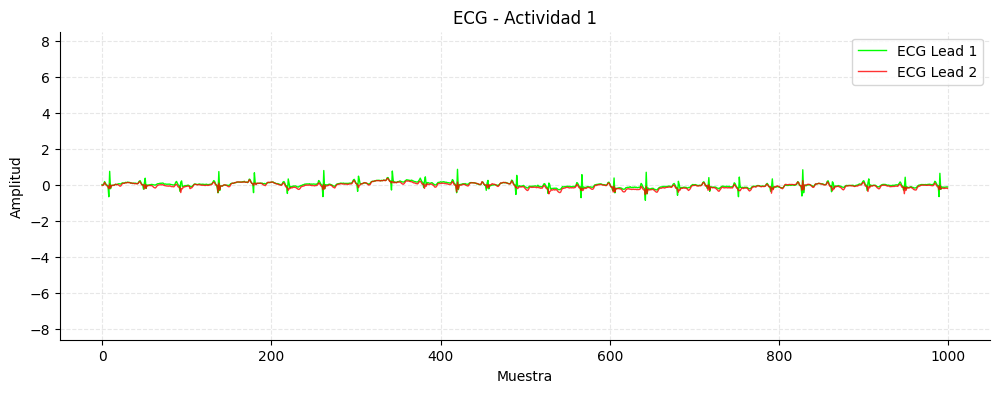

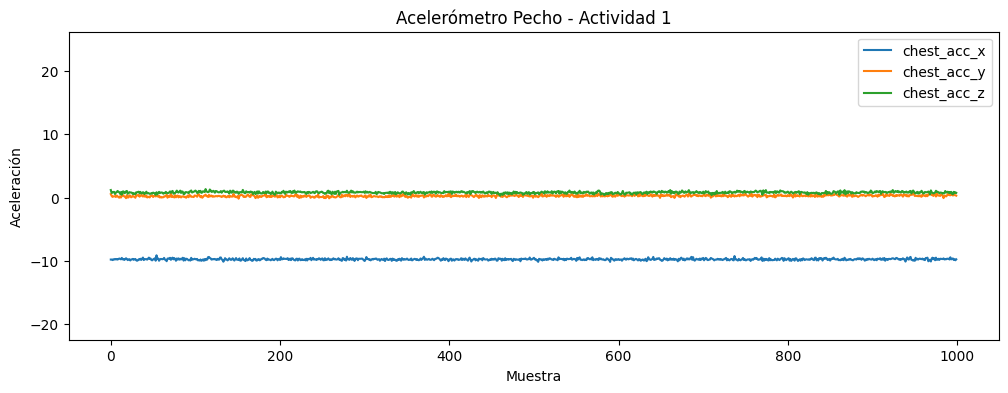

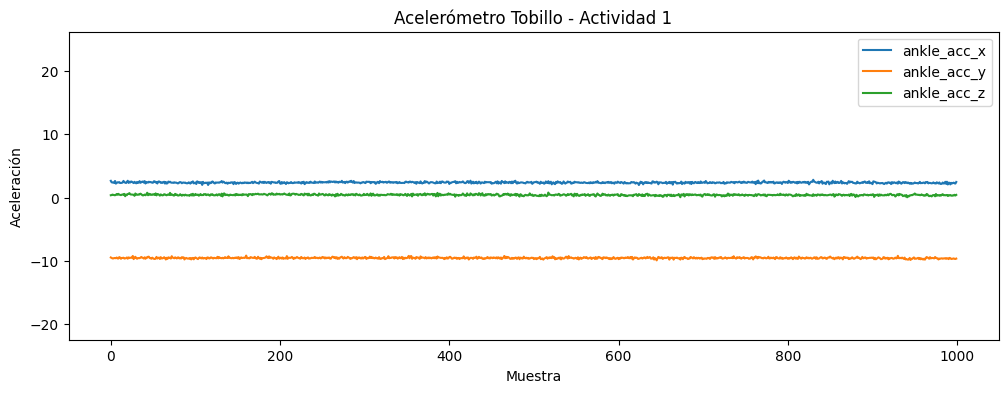

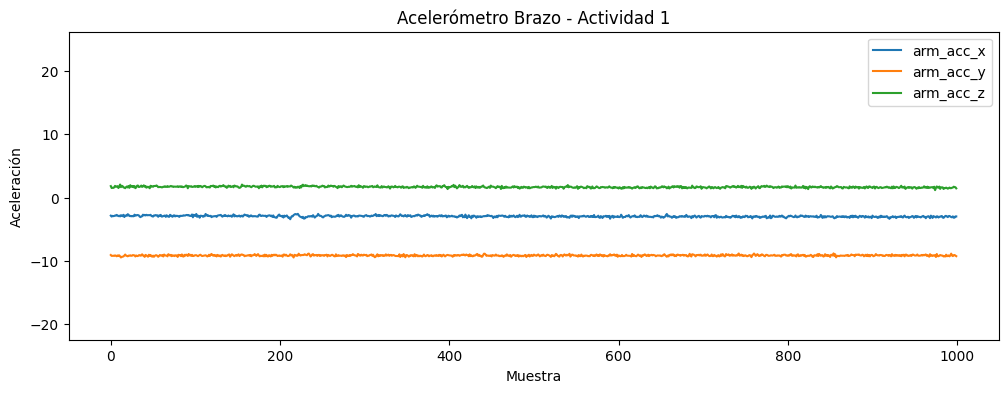

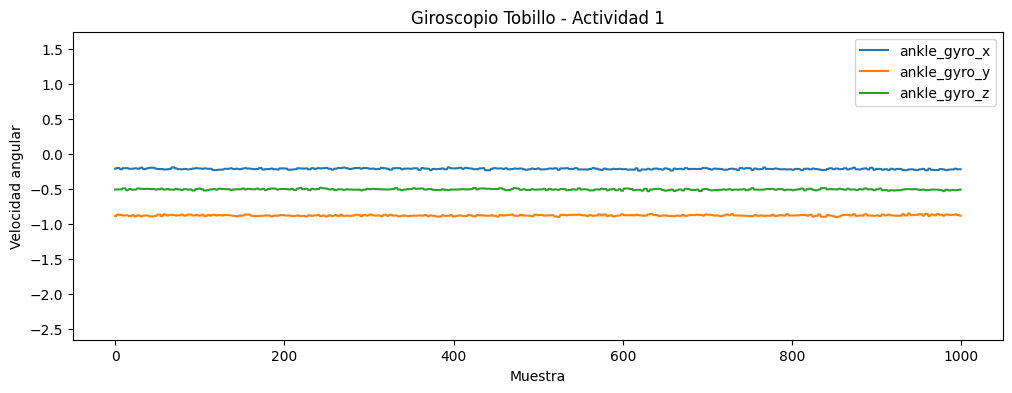

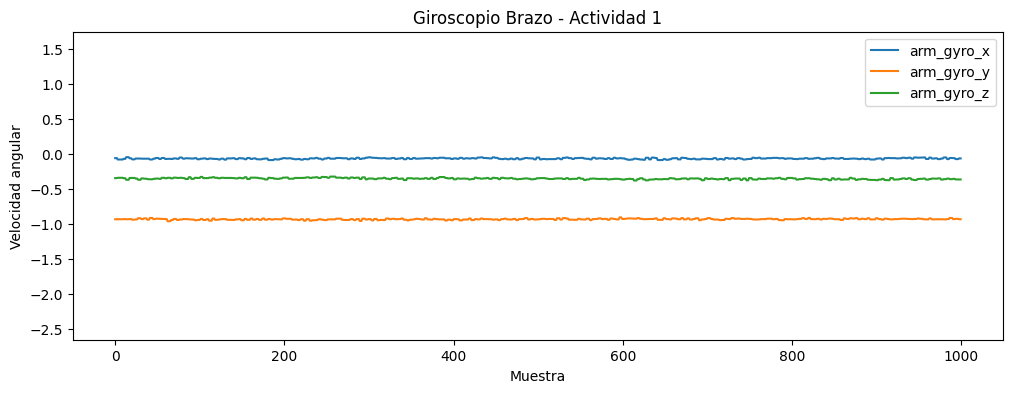

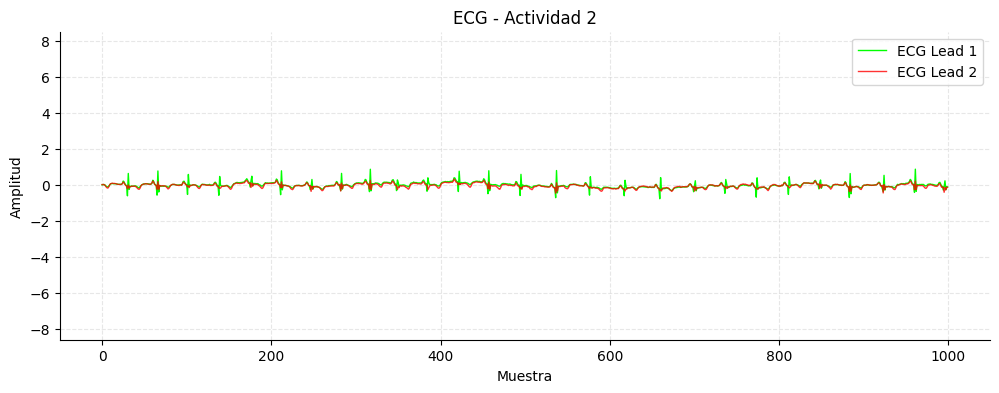

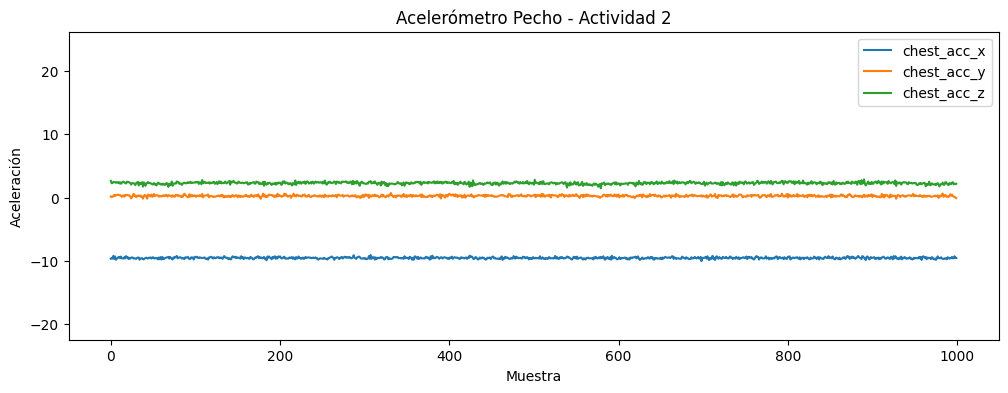

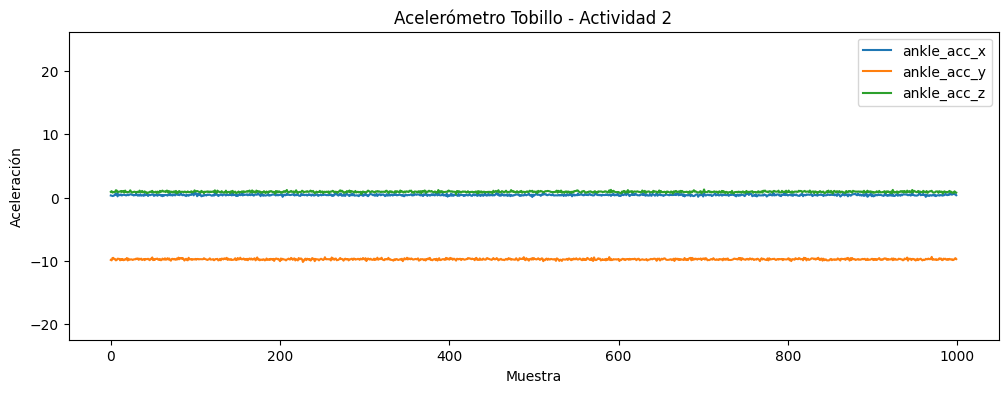

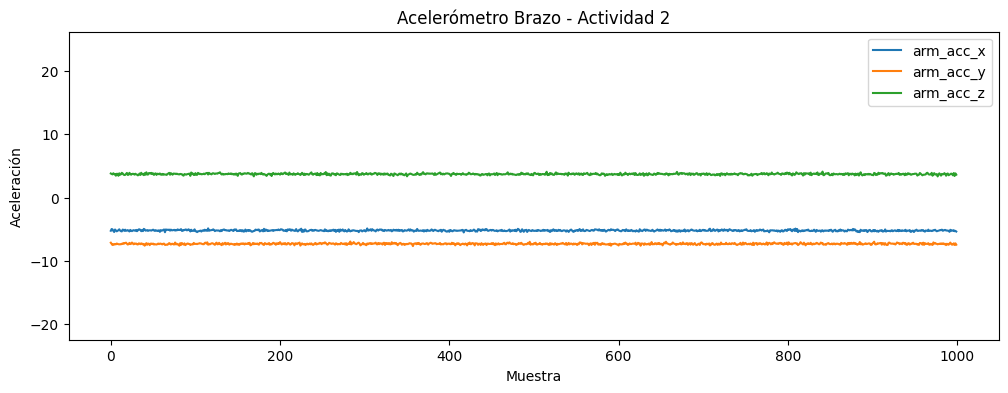

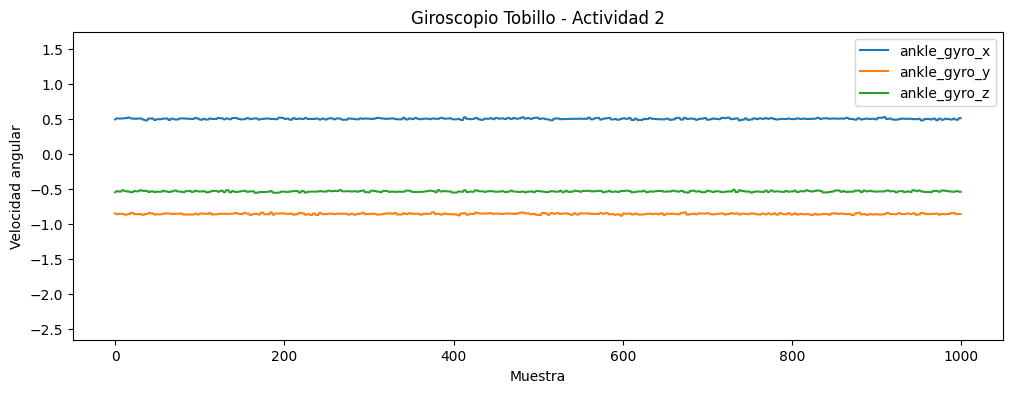

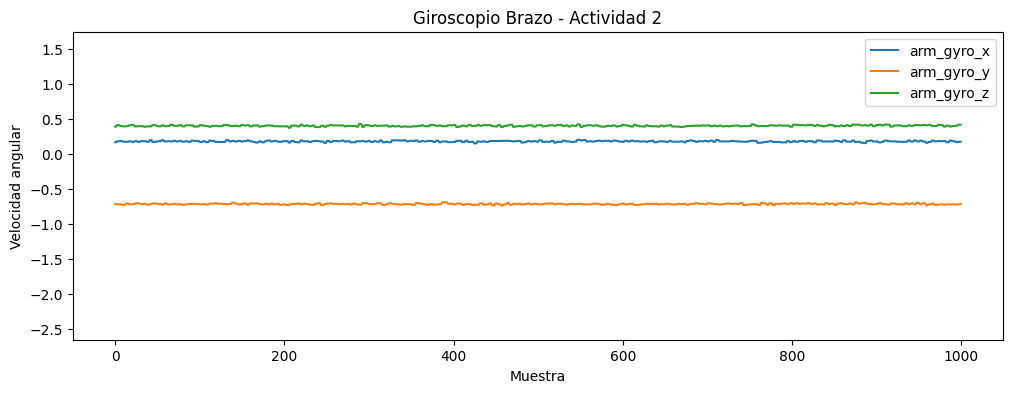

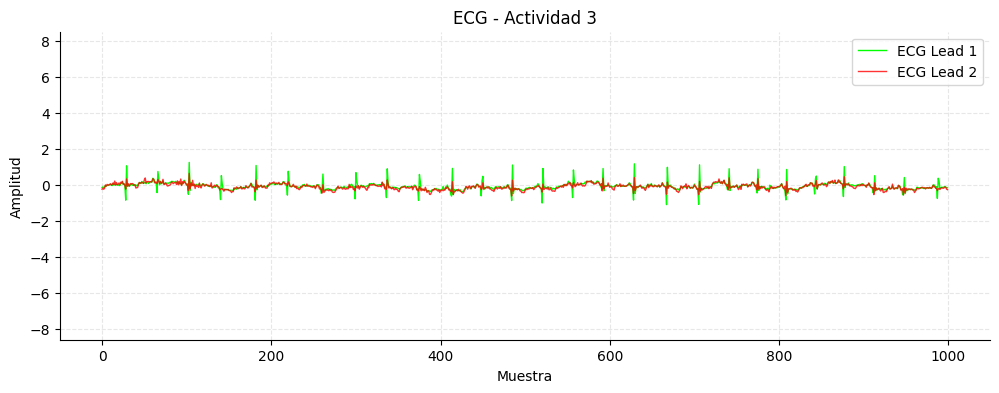

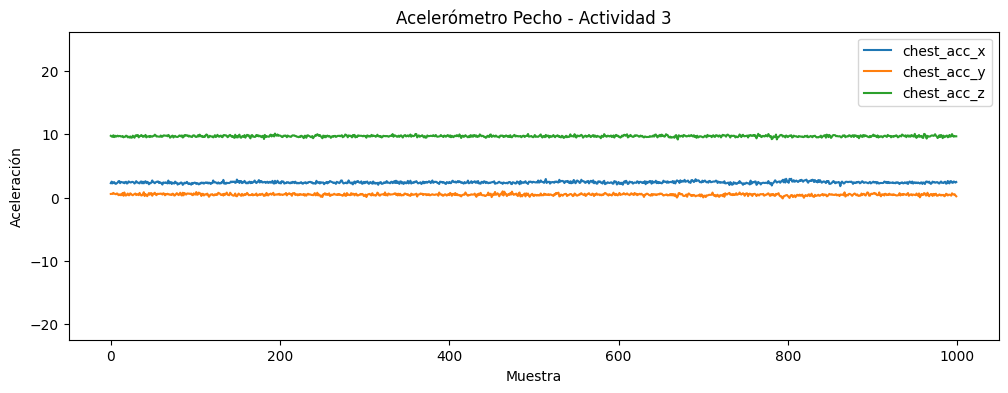

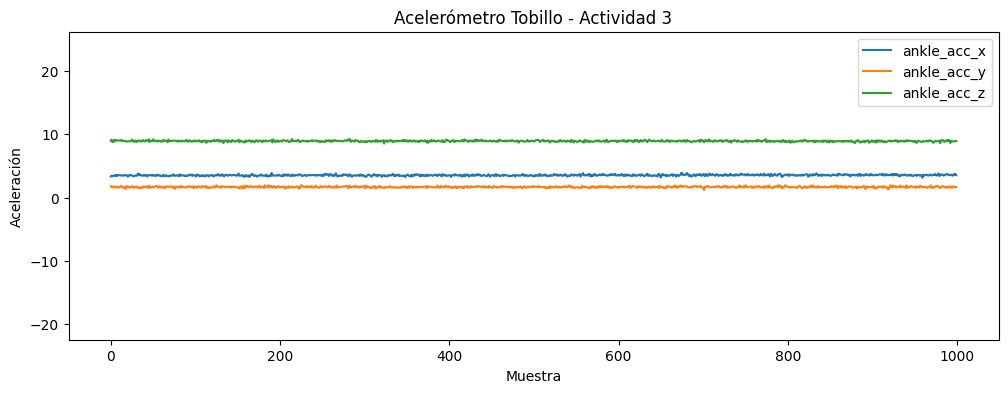

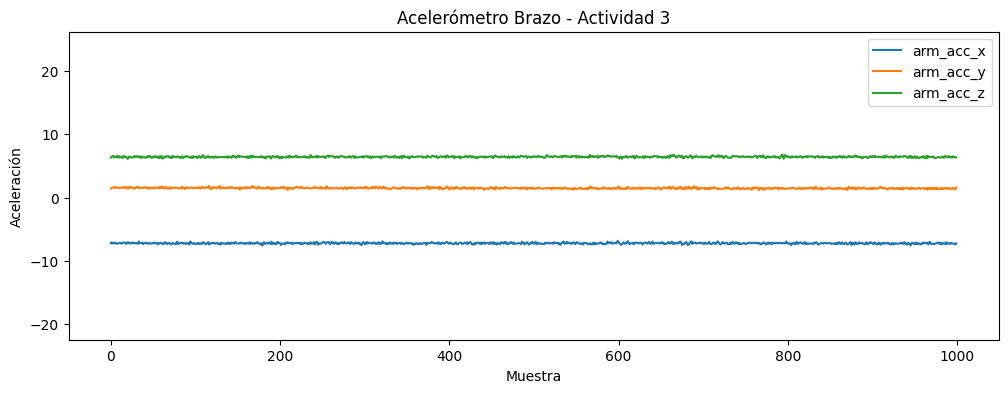

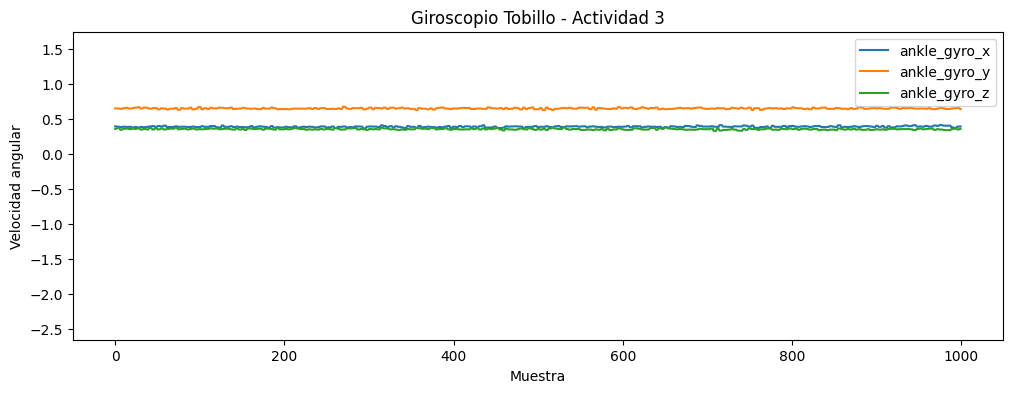

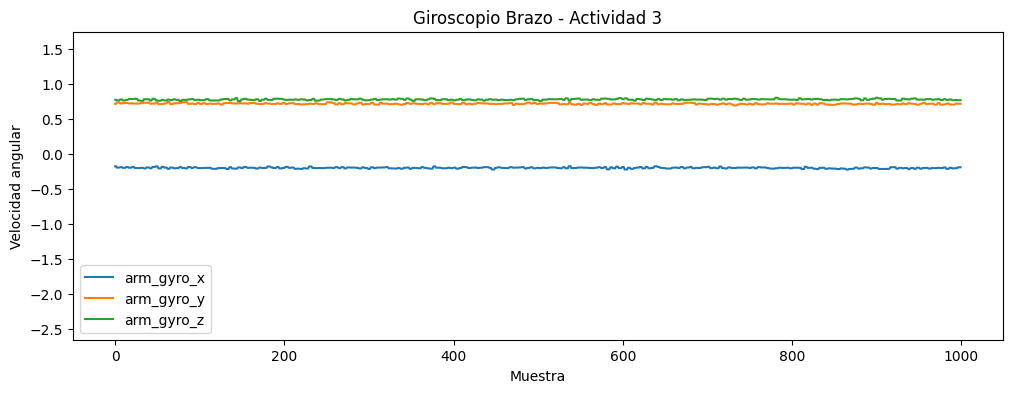

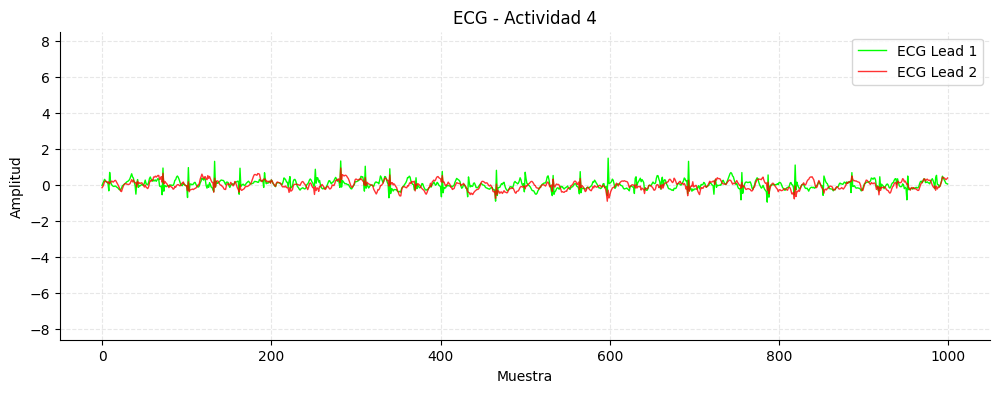

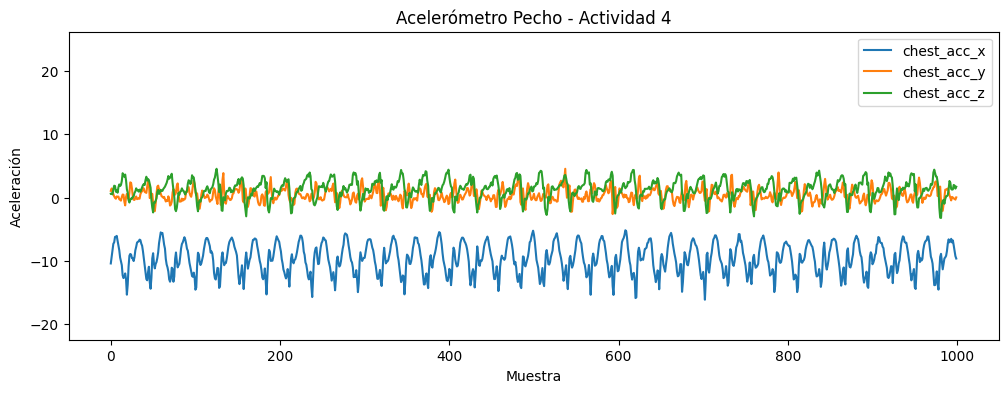

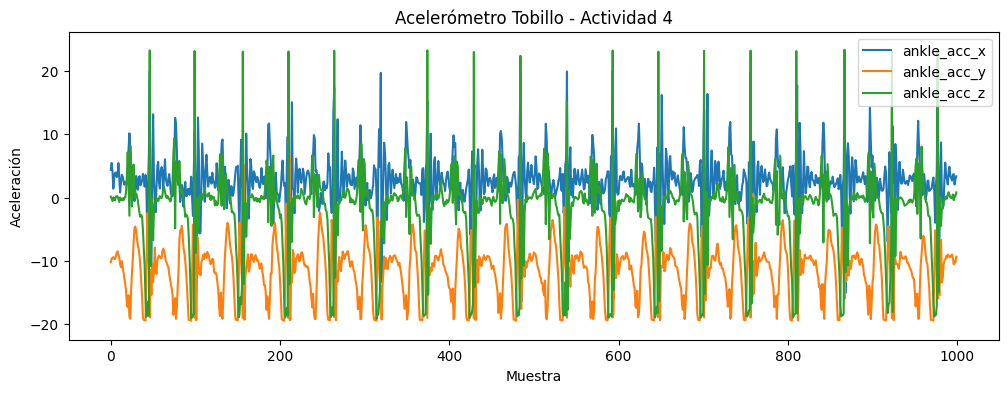

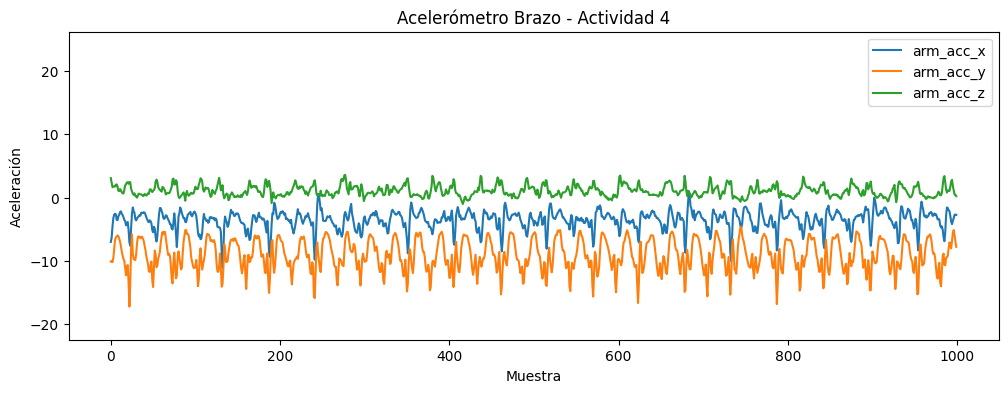

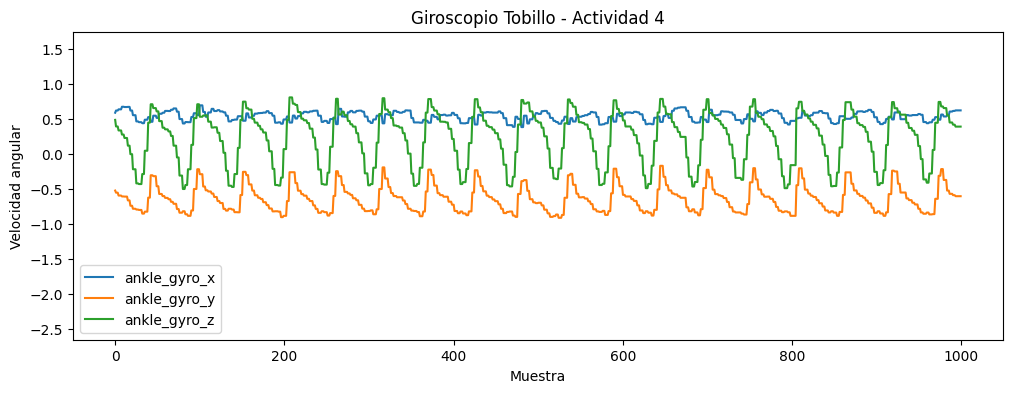

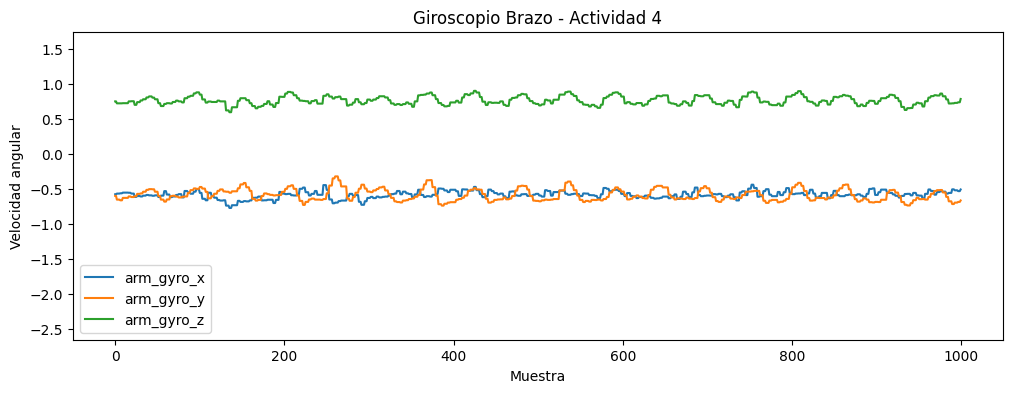

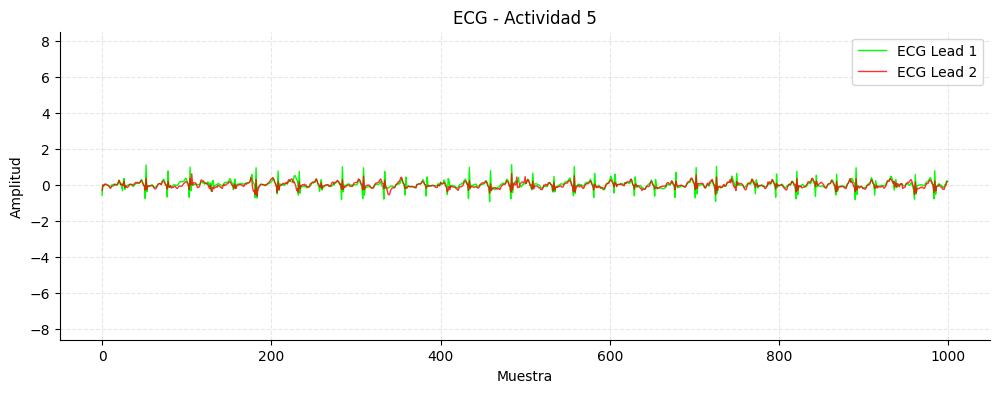

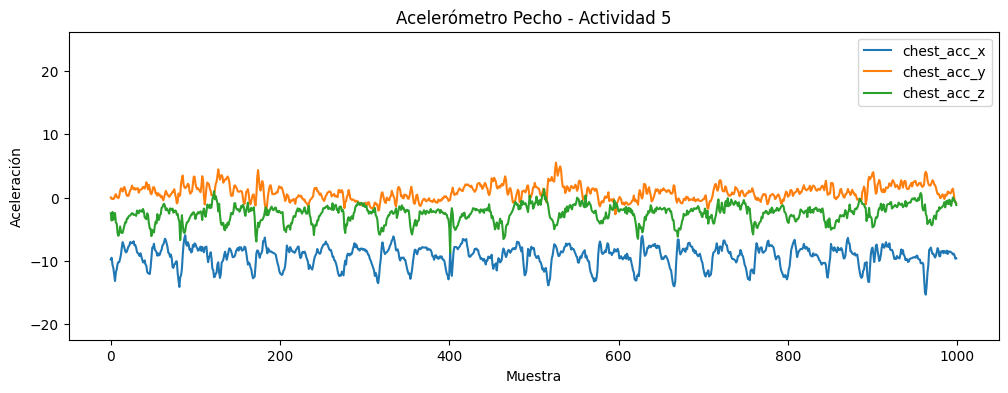

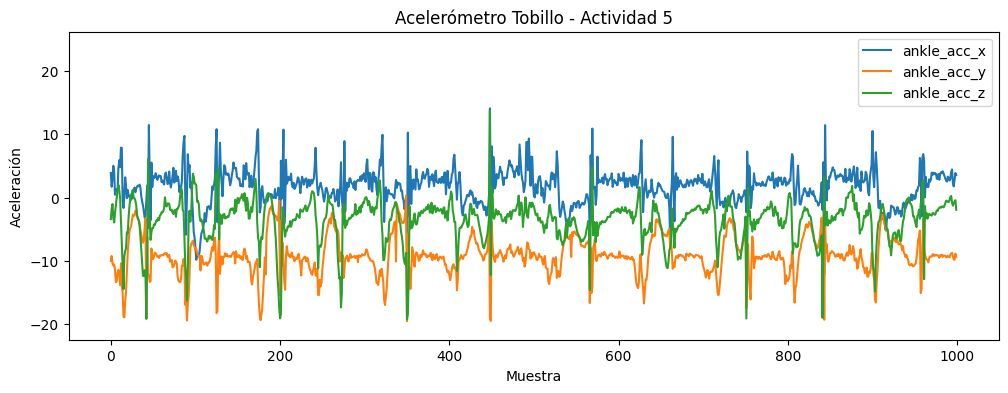

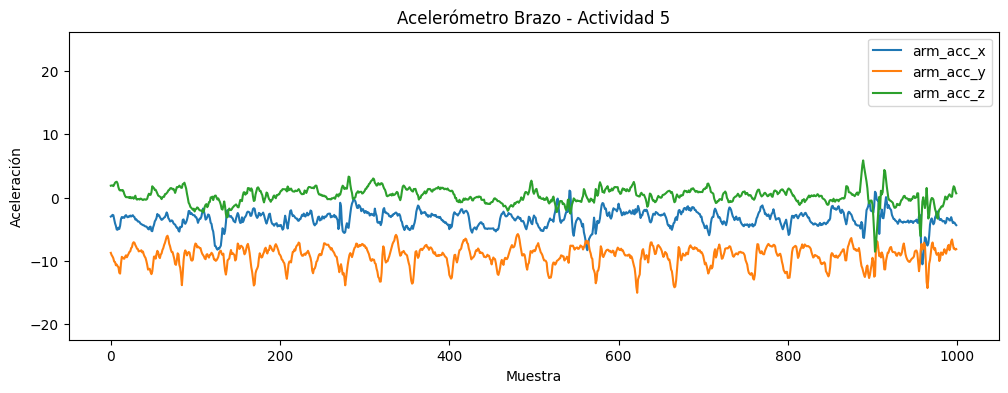

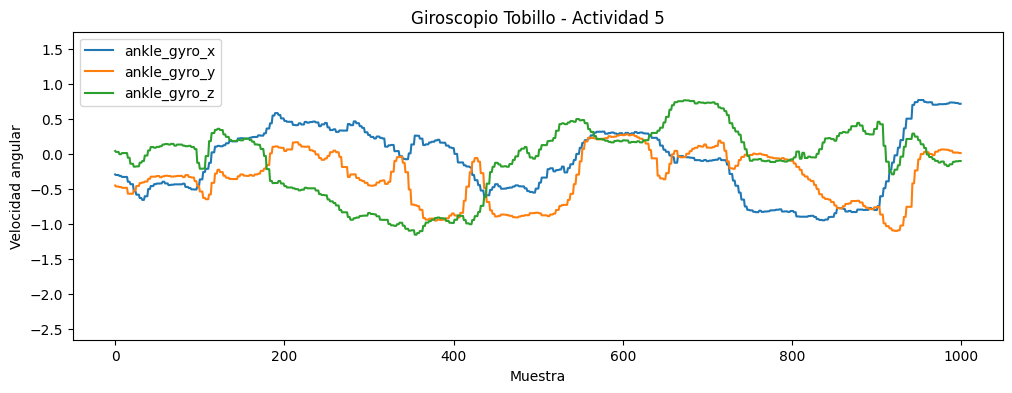

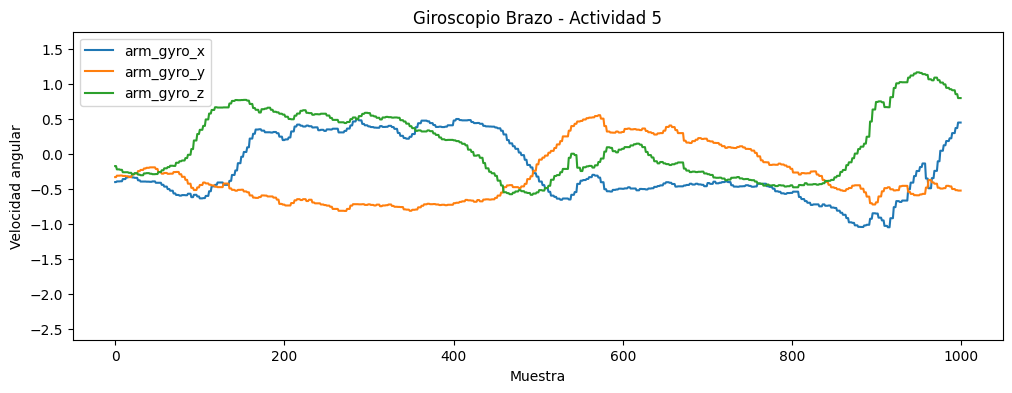

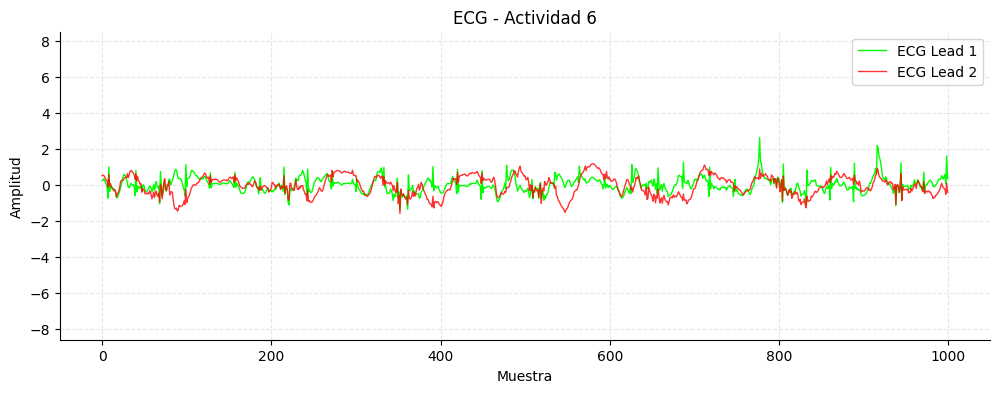

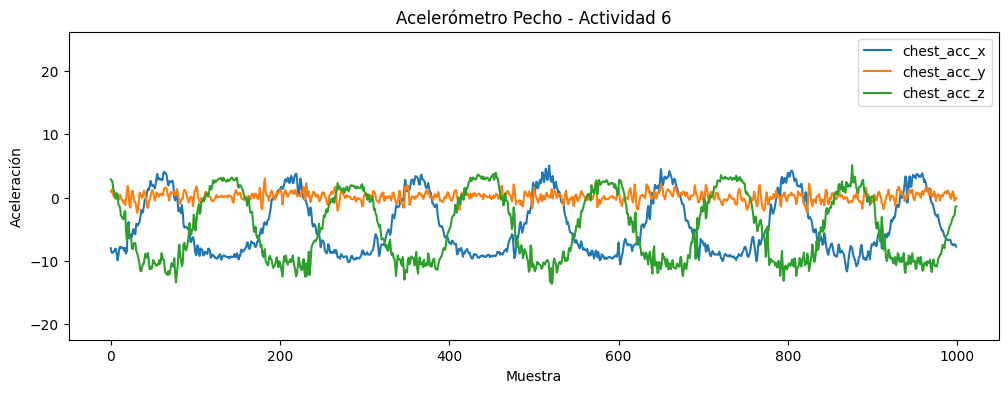

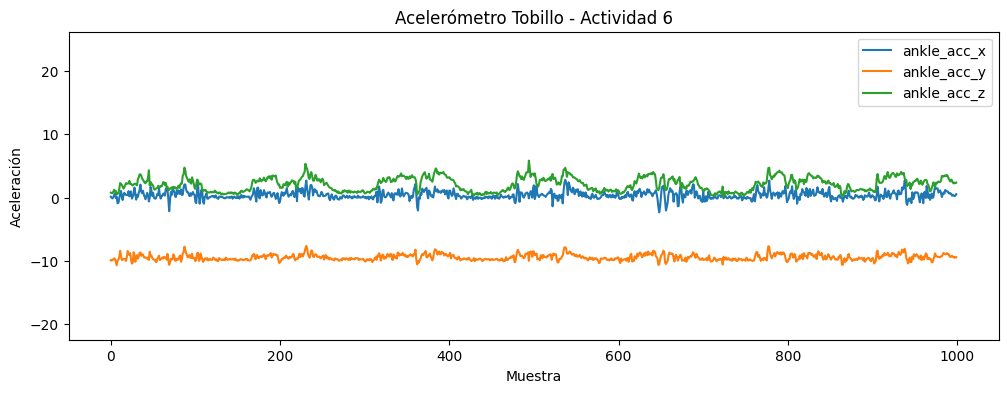

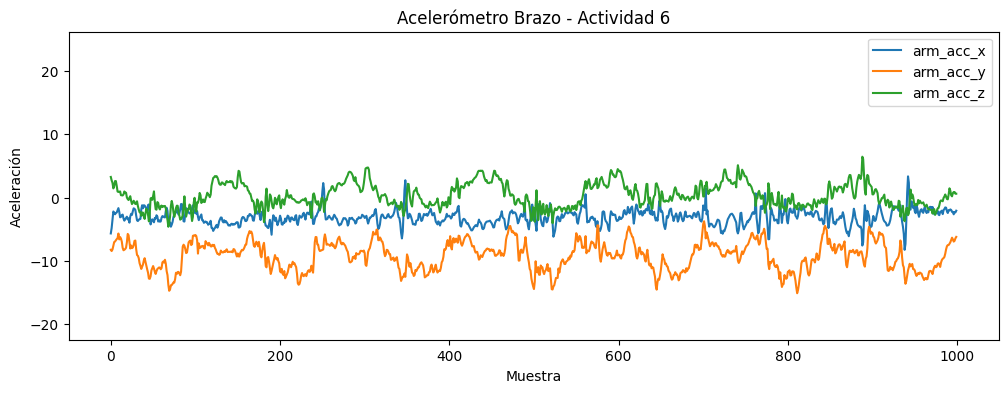

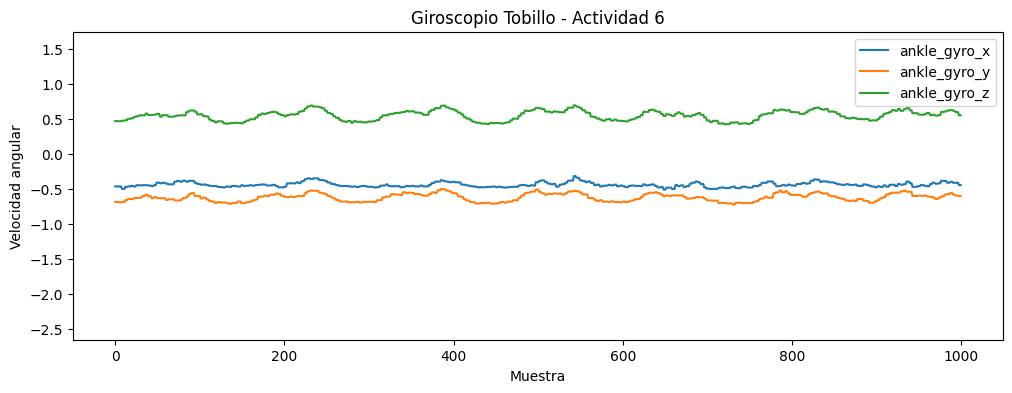

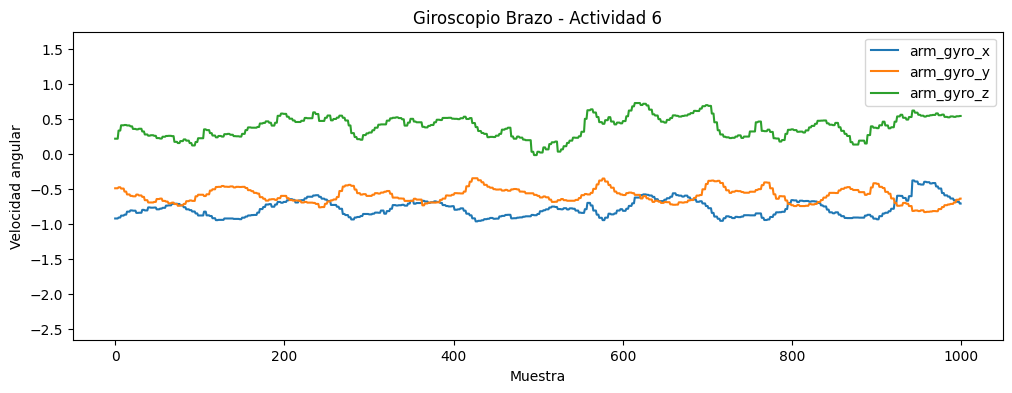

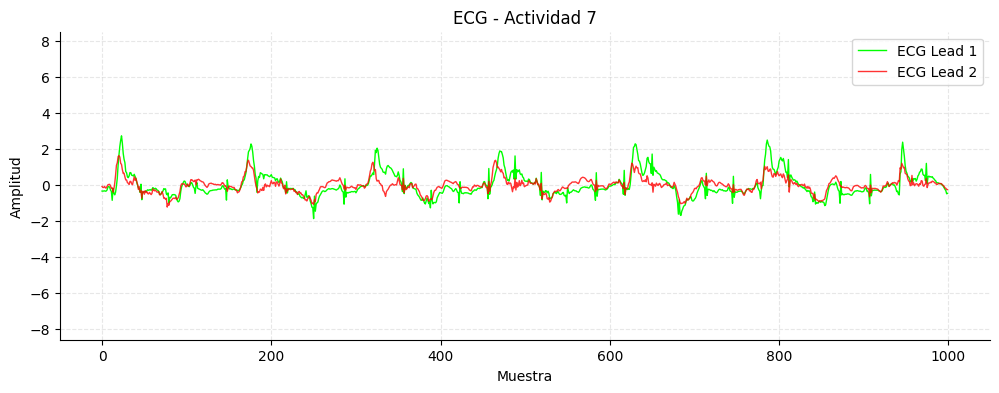

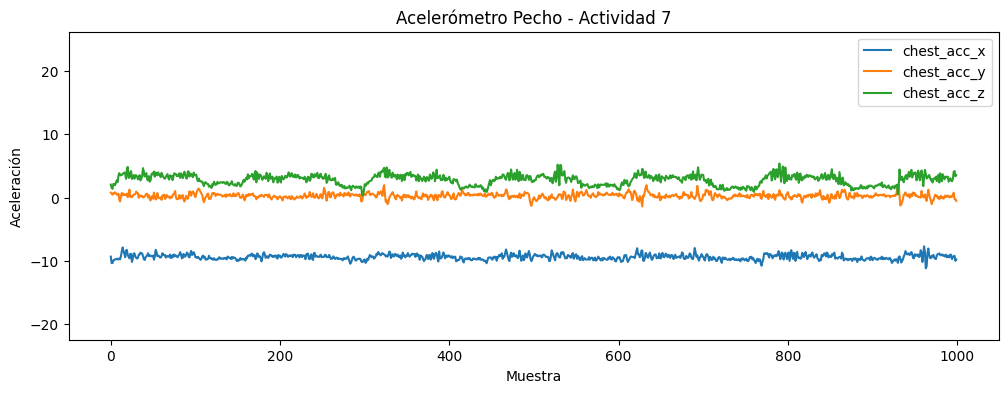

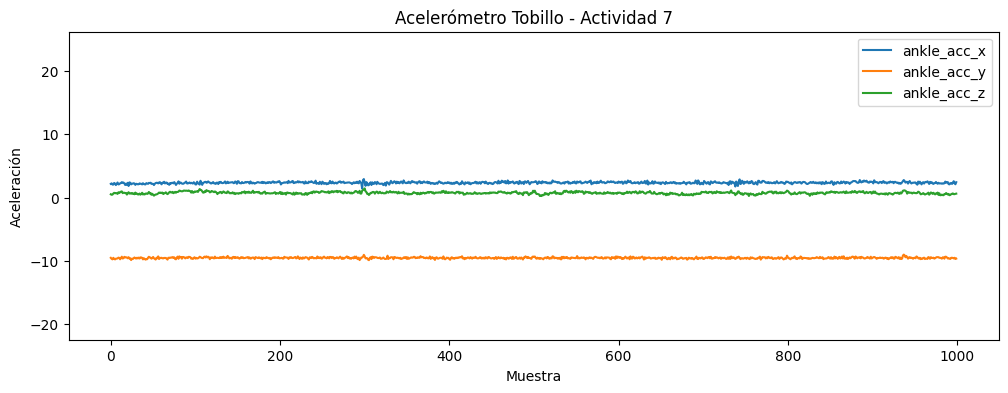

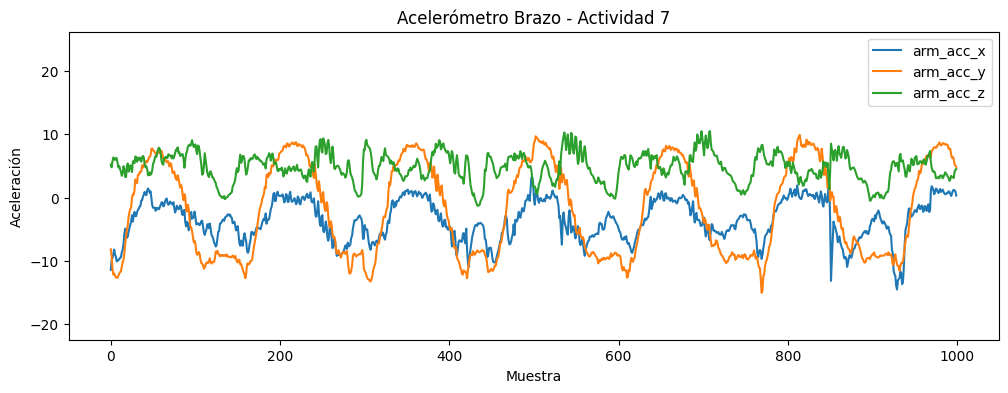

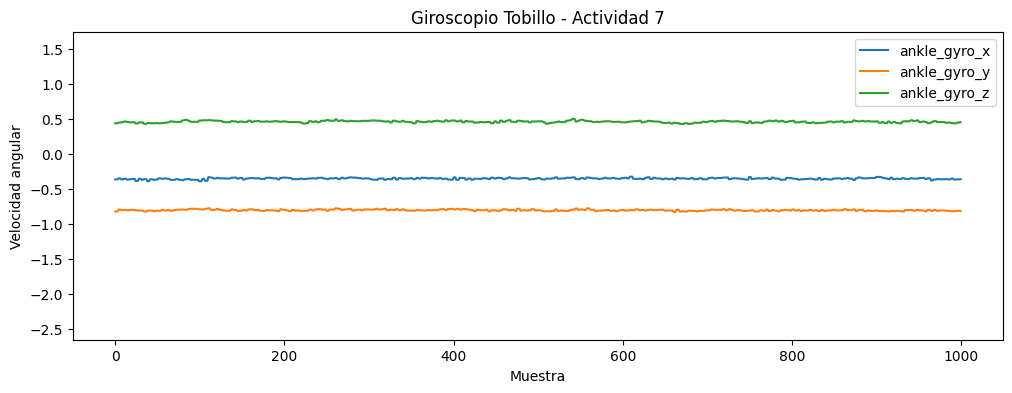

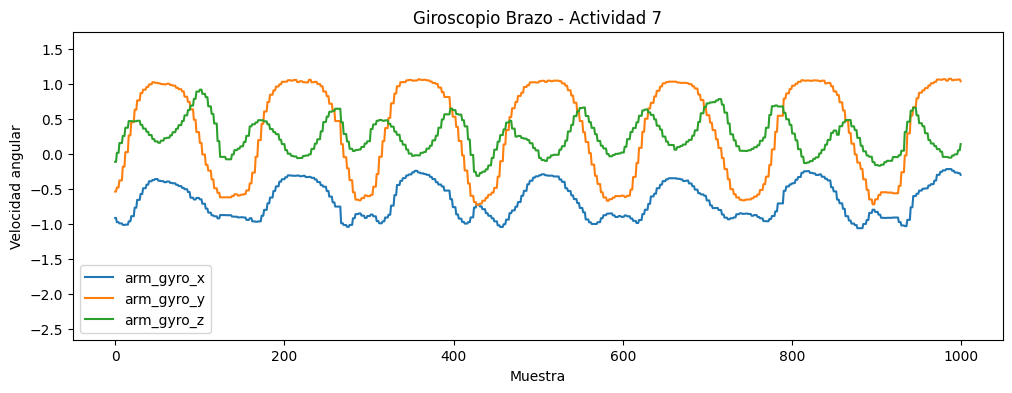

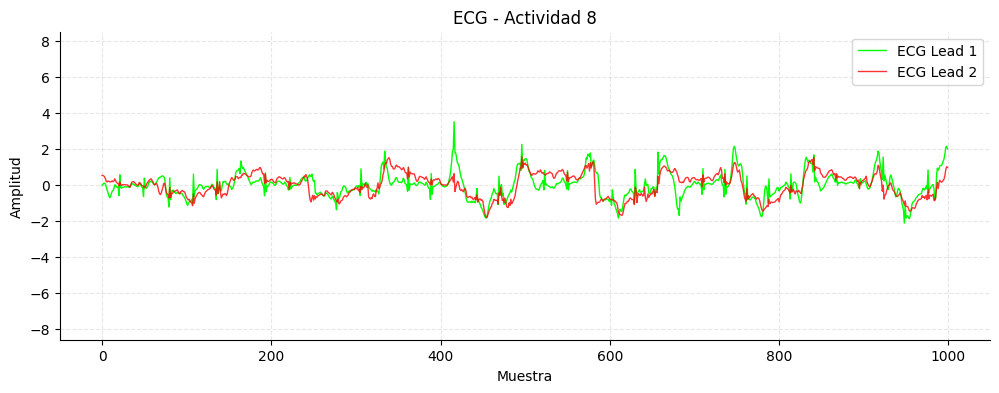

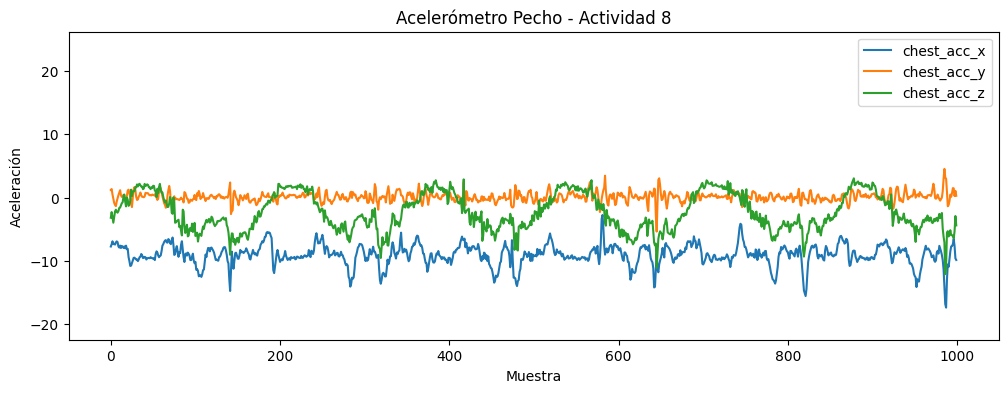

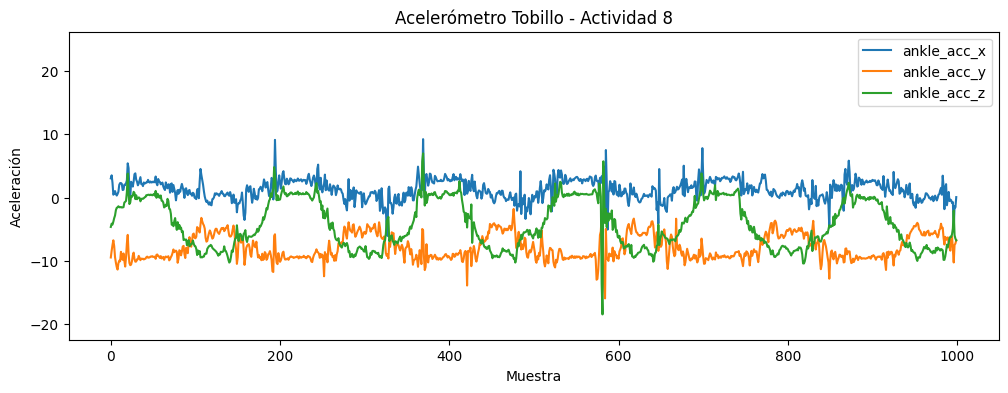

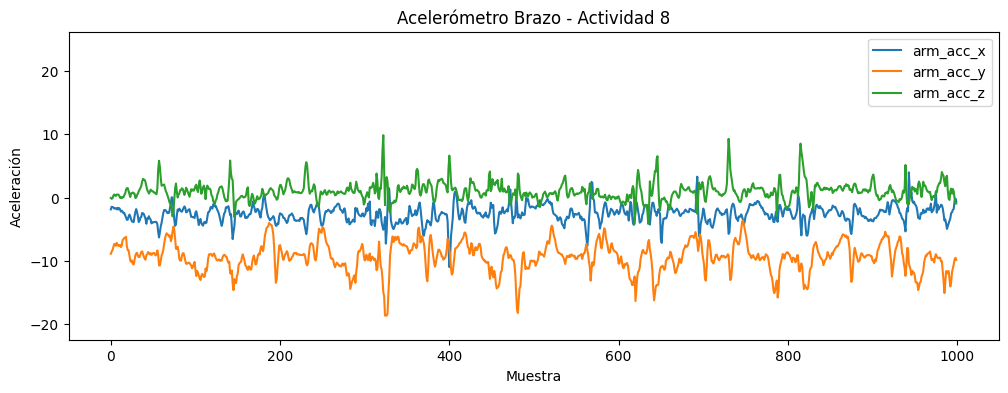

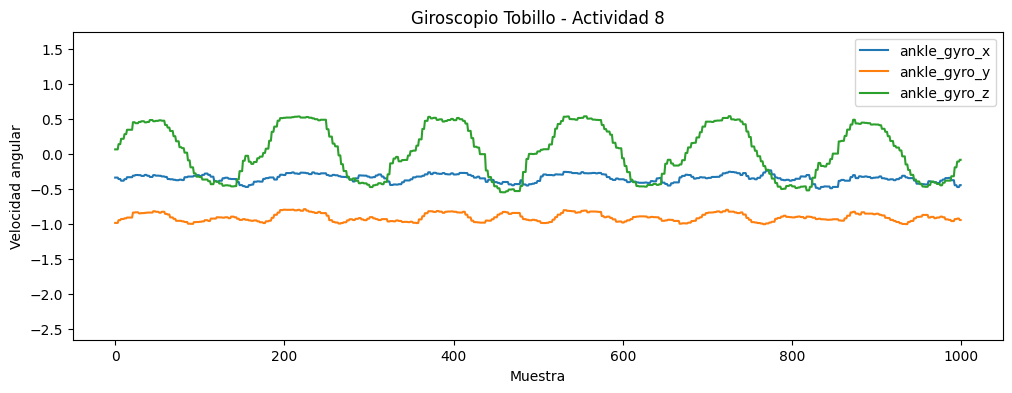

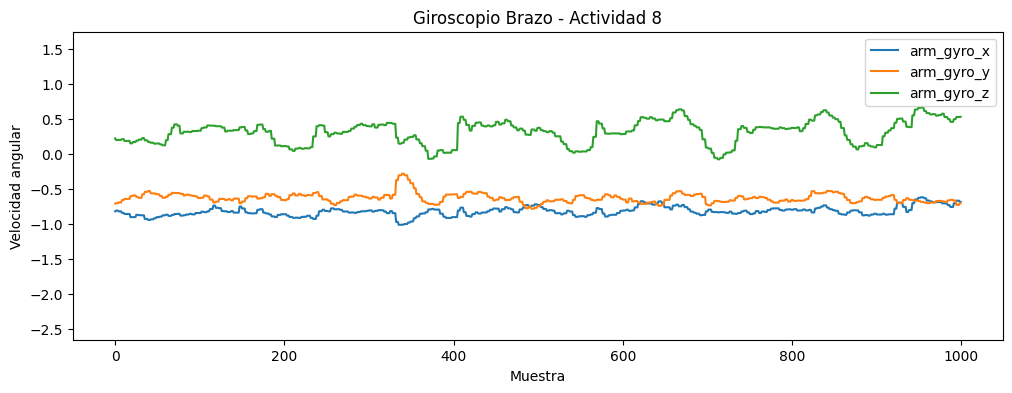

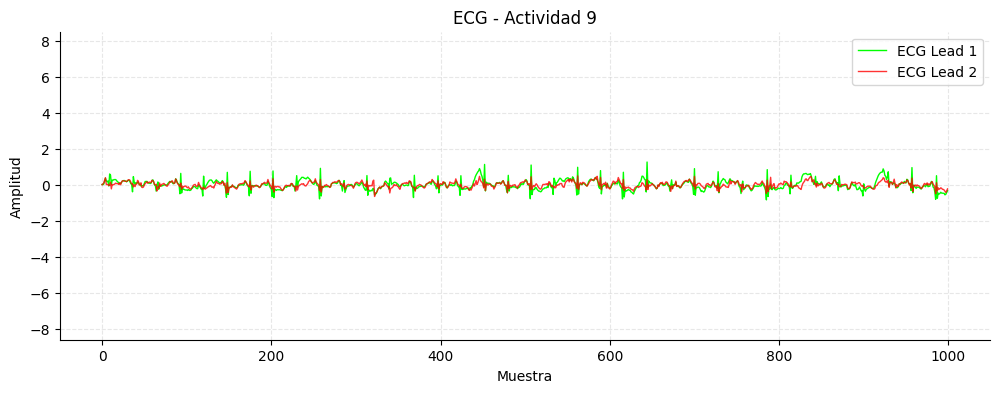

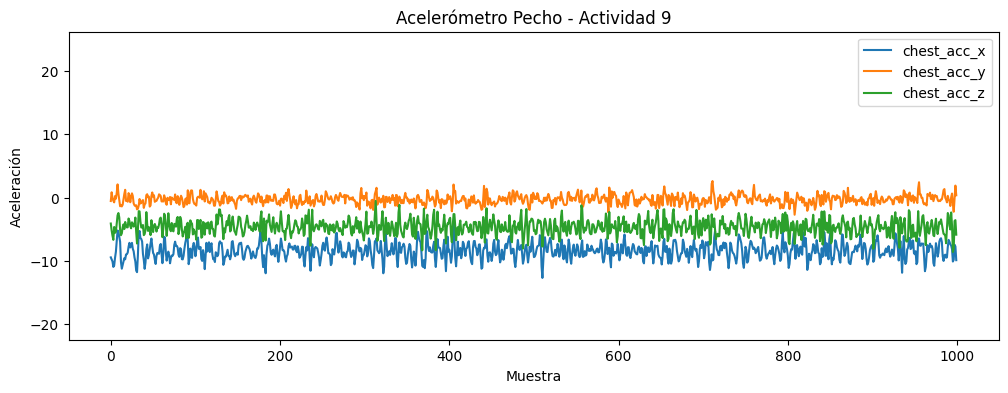

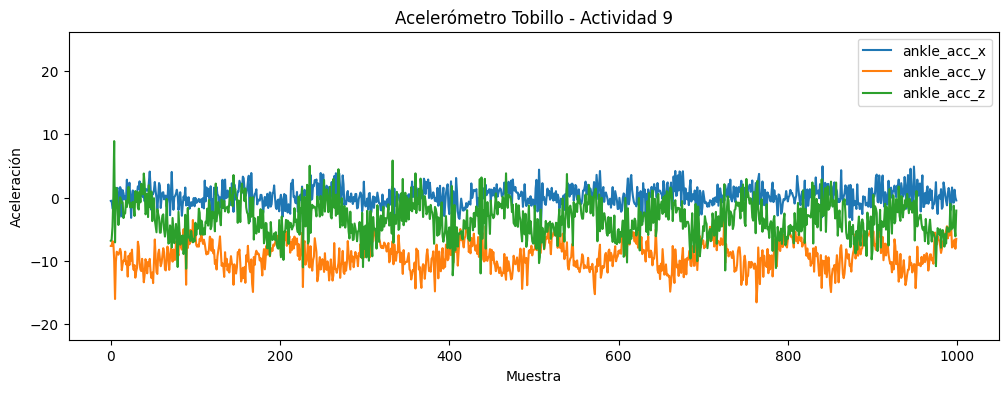

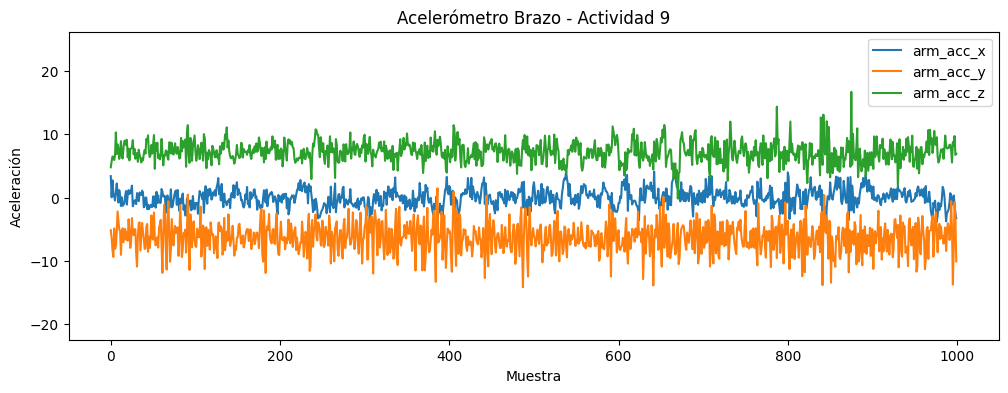

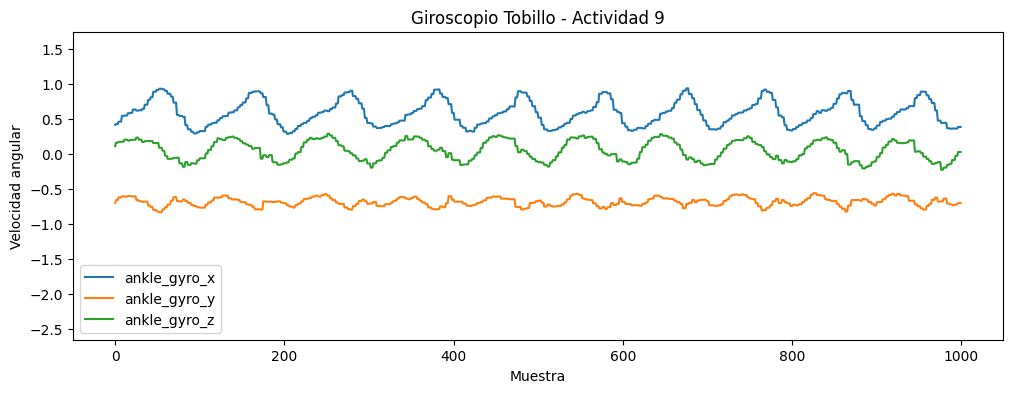

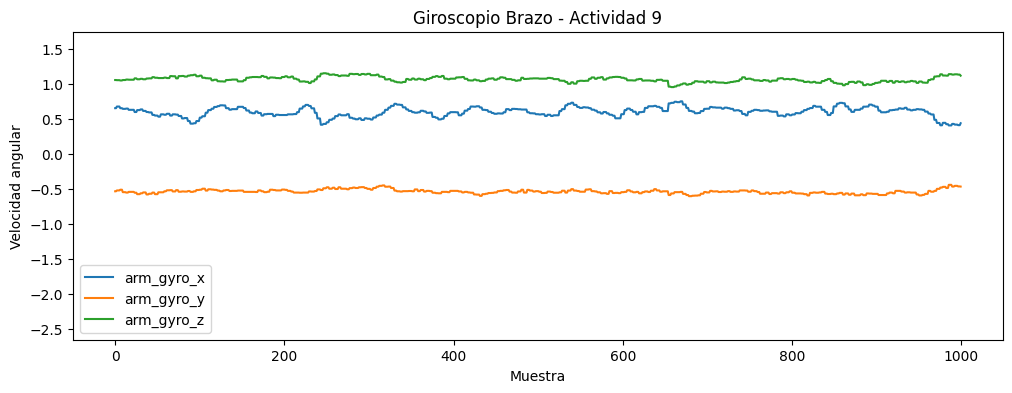

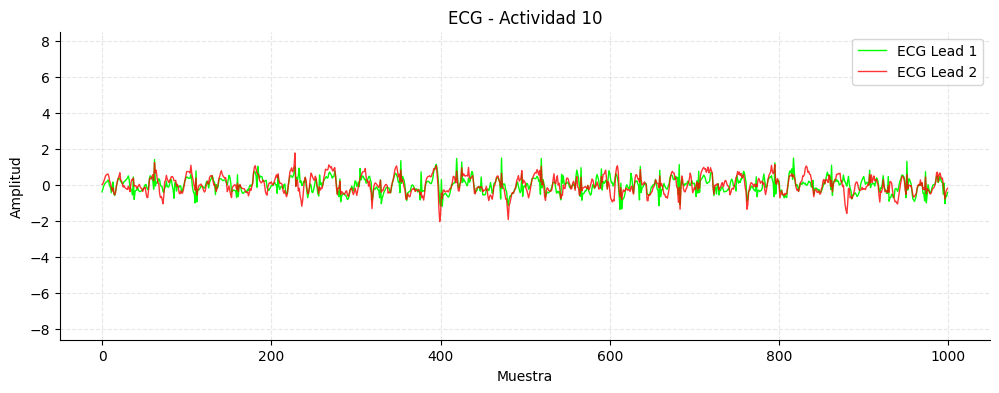

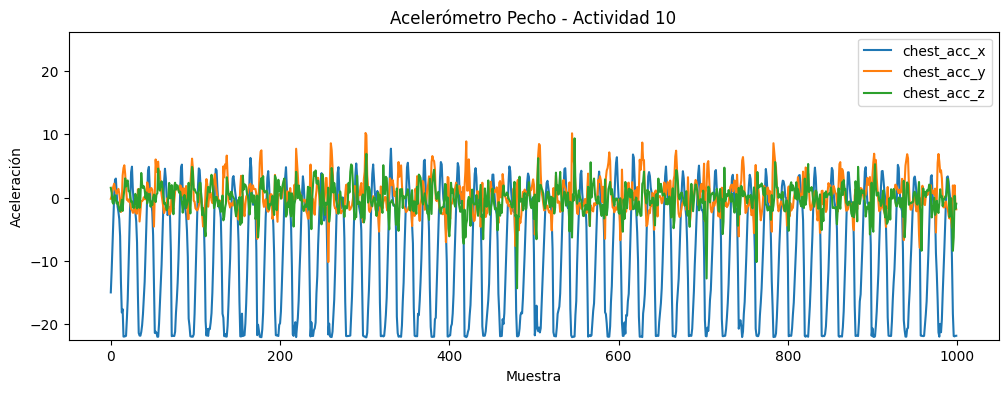

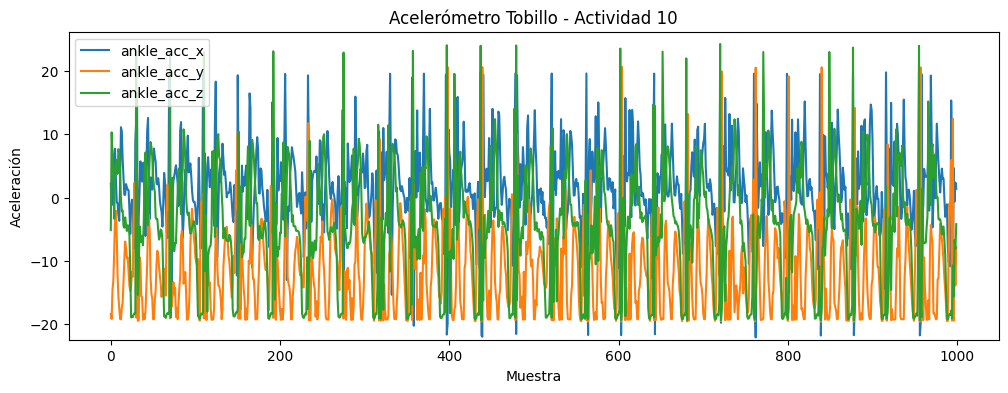

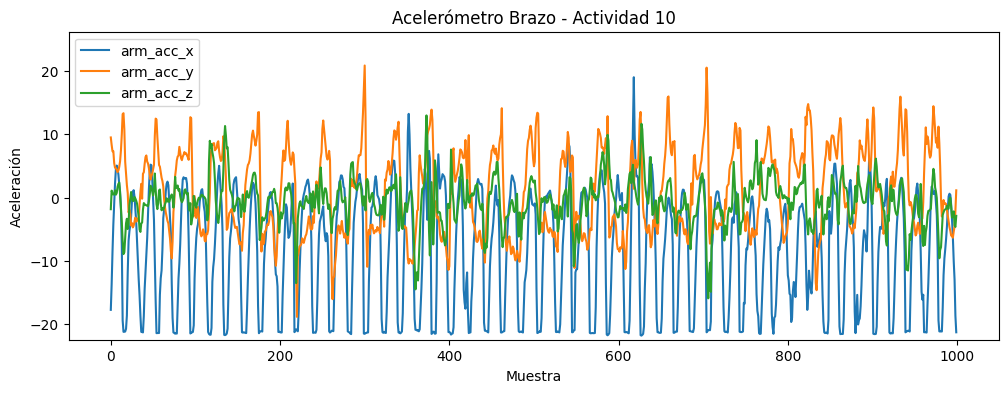

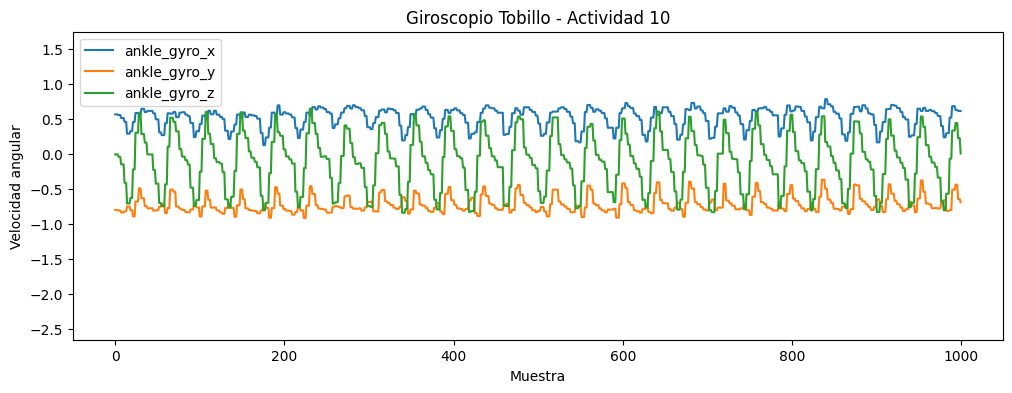

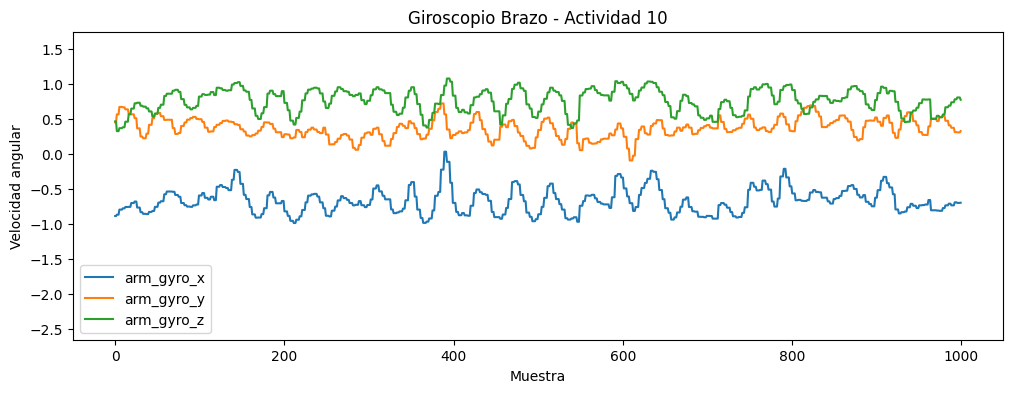

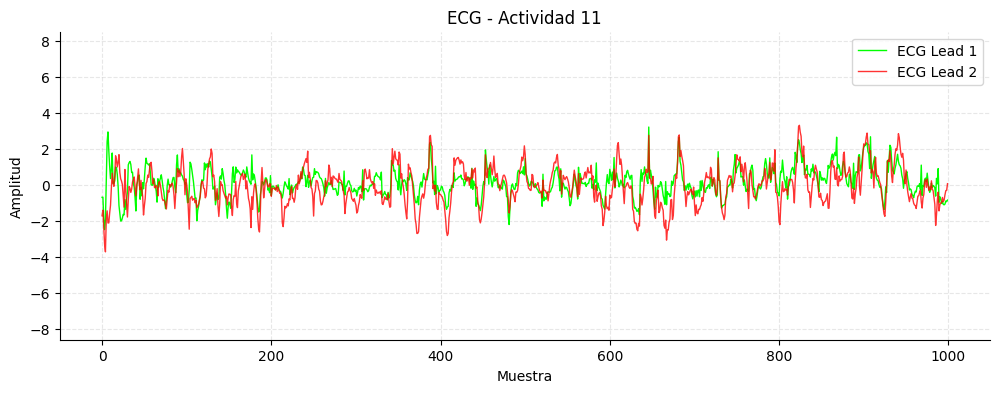

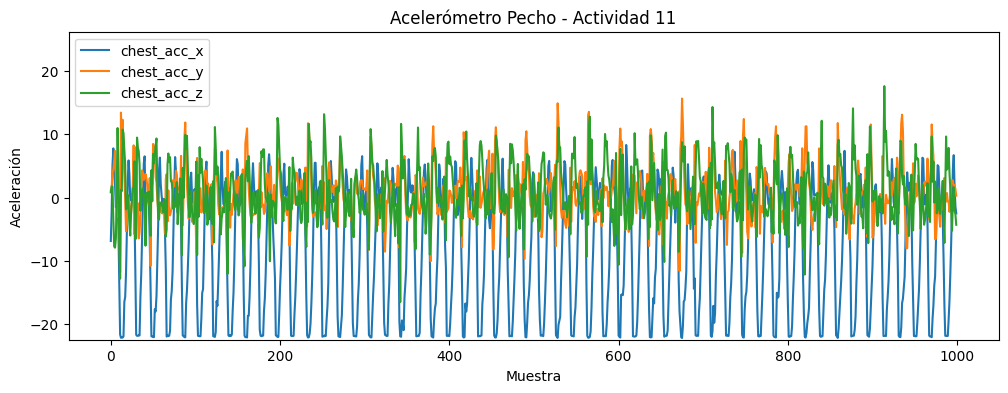

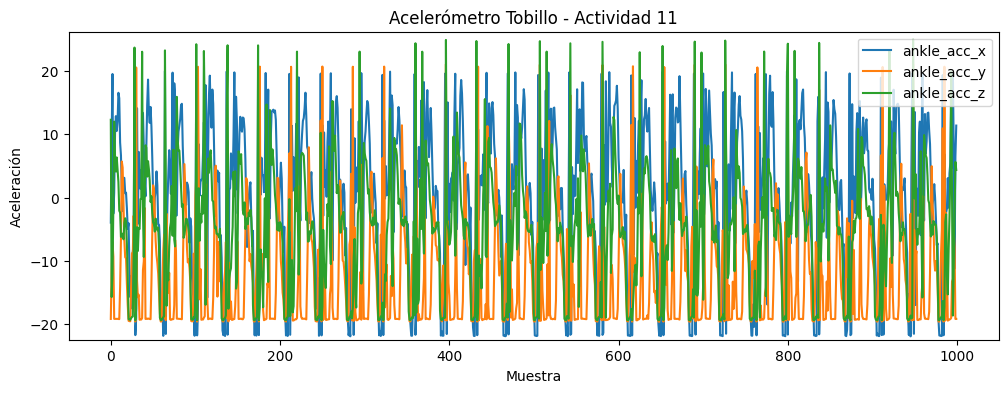

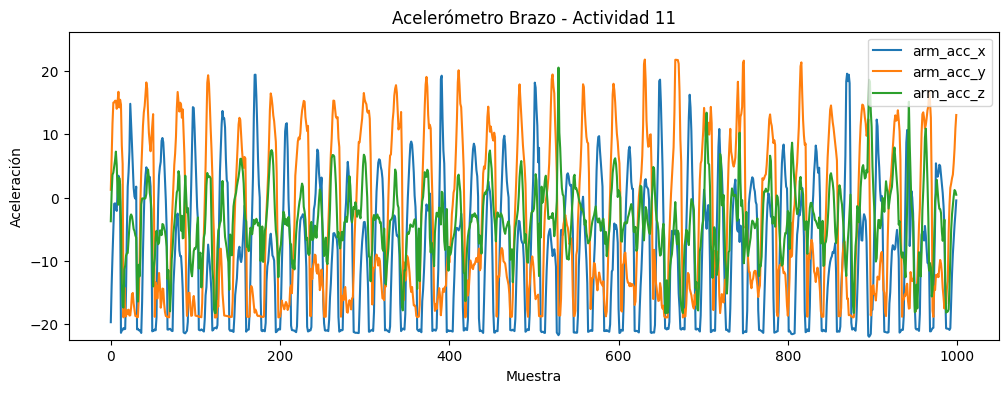

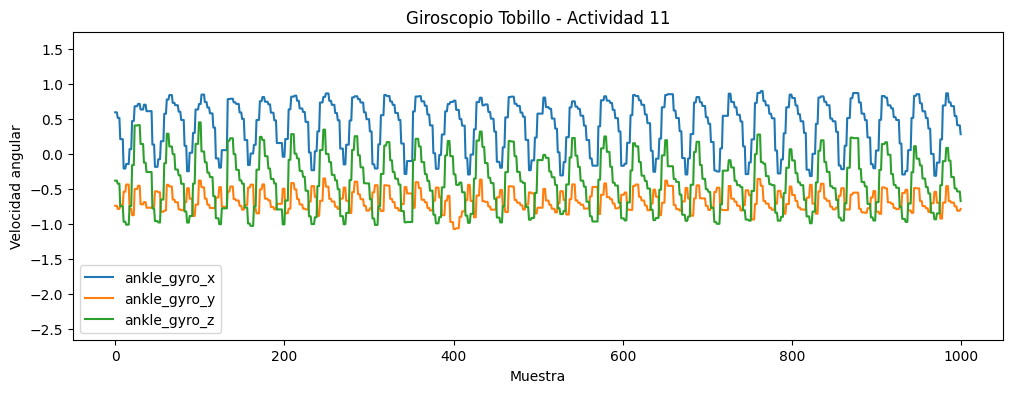

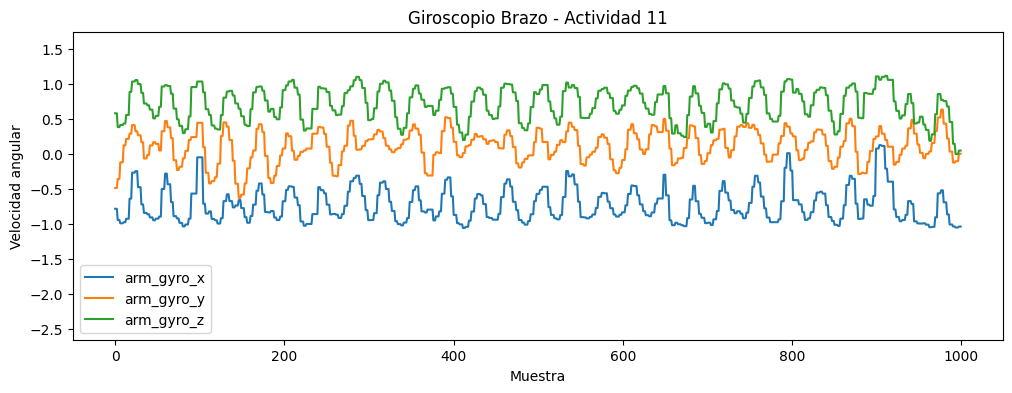

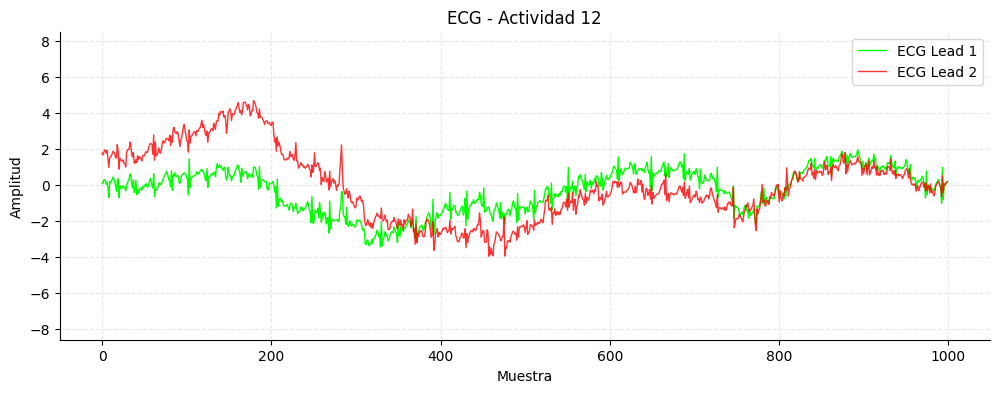

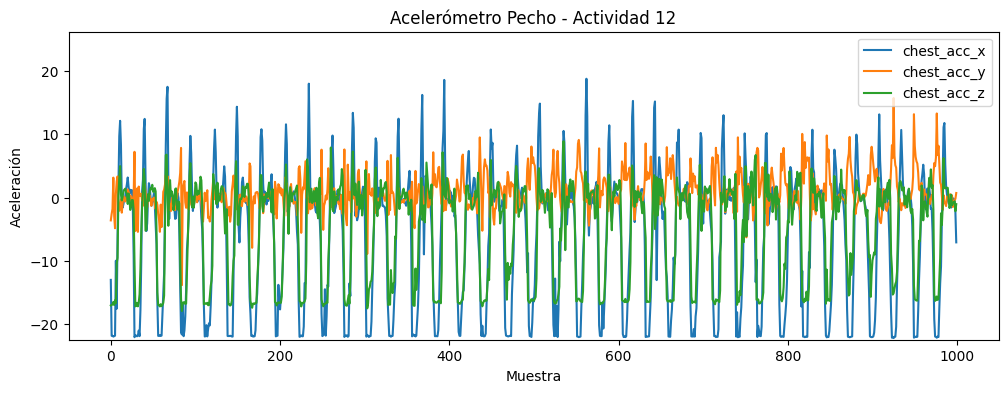

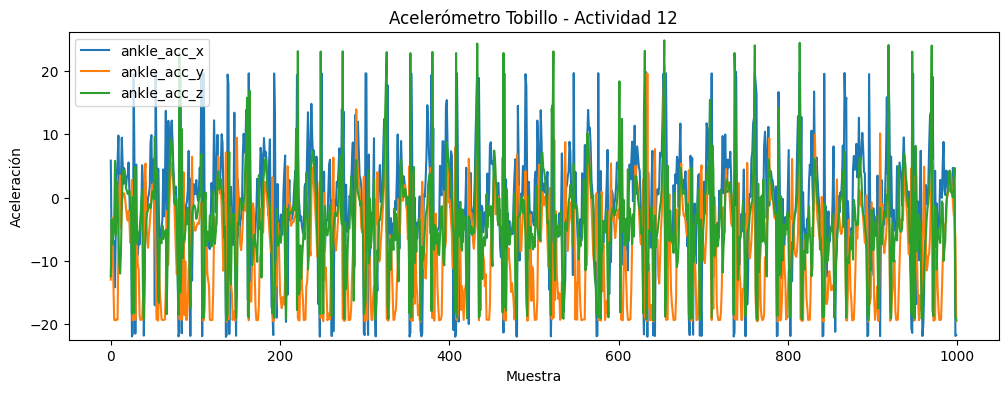

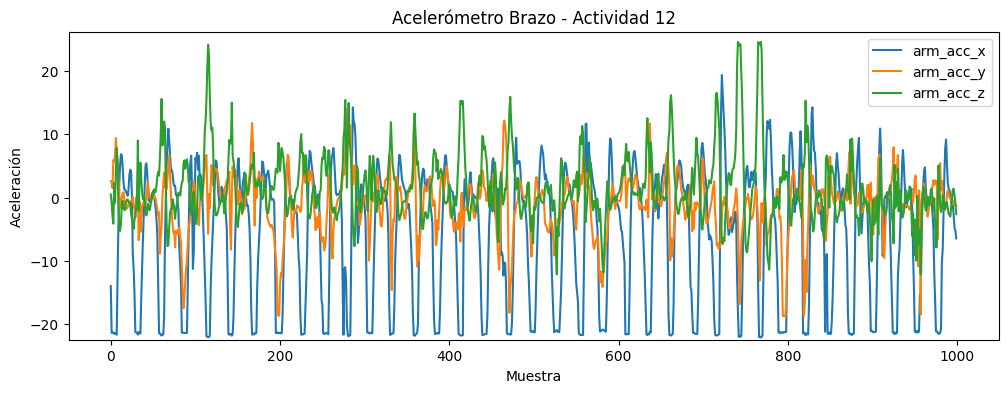

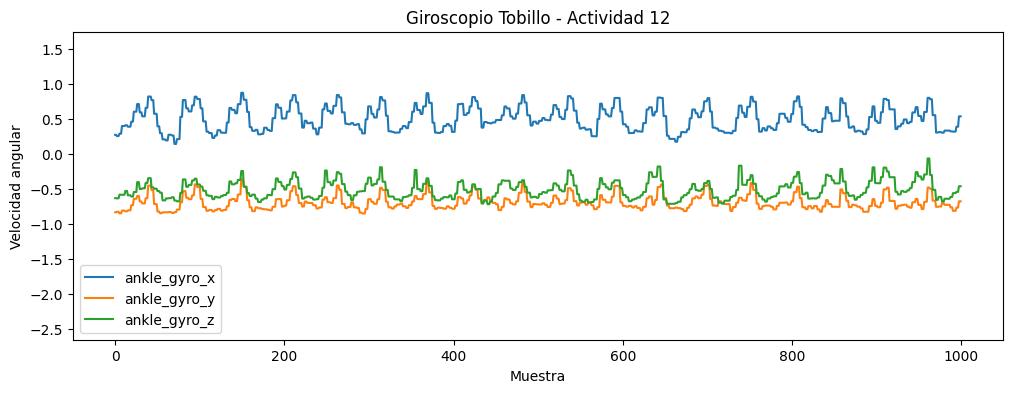

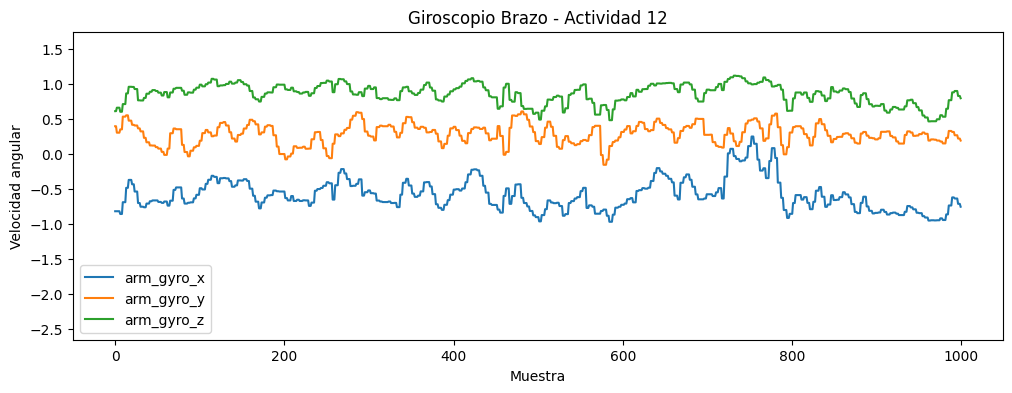

In [40]:
import matplotlib.pyplot as plt

# --- Configuración ECG estilo monitor cardiaco ---
def estilo_ecg_blanco_simple():
    plt.style.use("default")
    plt.grid(True, linestyle="--", alpha=0.3)
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# --- Columnas de sensores ---
ecg_cols = ["ecg_1", "ecg_2"]

acc_chest = ["chest_acc_x", "chest_acc_y", "chest_acc_z"]
acc_ankle = ["ankle_acc_x", "ankle_acc_y", "ankle_acc_z"]
acc_arm   = ["arm_acc_x", "arm_acc_y", "arm_acc_z"]

gyro_ankle = ["ankle_gyro_x", "ankle_gyro_y", "ankle_gyro_z"]
gyro_arm   = ["arm_gyro_x", "arm_gyro_y", "arm_gyro_z"]

# --- Límites globales ---
ymin_ecg, ymax_ecg = df[ecg_cols].min().min(), df[ecg_cols].max().max()
ymin_acc, ymax_acc = df[acc_chest+acc_ankle+acc_arm].min().min(), df[acc_chest+acc_ankle+acc_arm].max().max()
ymin_gyro, ymax_gyro = df[gyro_ankle+gyro_arm].min().min(), df[gyro_ankle+gyro_arm].max().max()

# --- Actividades ---
actividades = sorted(df["label"].unique())
muestras = 1000  # muestras por gráfico

for label in actividades:
    df_act = df[df["label"] == label]

    # --- ECG ---
    plt.figure(figsize=(12, 4))
    estilo_ecg_blanco_simple()
    plt.plot(df_act["ecg_1"].values[:muestras], color="lime", lw=1, label="ECG Lead 1")
    plt.plot(df_act["ecg_2"].values[:muestras], color="red", lw=1, alpha=0.8, label="ECG Lead 2")
    plt.ylim(ymin_ecg, ymax_ecg)
    plt.title(f"ECG - Actividad {label}", color="black")
    plt.xlabel("Muestra")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.show()

    # --- Acelerómetro pecho ---
    plt.figure(figsize=(12, 4))
    for col in acc_chest:
        plt.plot(df_act[col].values[:muestras], label=col)
    plt.ylim(ymin_acc, ymax_acc)
    plt.title(f"Acelerómetro Pecho - Actividad {label}")
    plt.xlabel("Muestra")
    plt.ylabel("Aceleración")
    plt.legend()
    plt.show()

    # --- Acelerómetro tobillo ---
    plt.figure(figsize=(12, 4))
    for col in acc_ankle:
        plt.plot(df_act[col].values[:muestras], label=col)
    plt.ylim(ymin_acc, ymax_acc)
    plt.title(f"Acelerómetro Tobillo - Actividad {label}")
    plt.xlabel("Muestra")
    plt.ylabel("Aceleración")
    plt.legend()
    plt.show()

    # --- Acelerómetro brazo ---
    plt.figure(figsize=(12, 4))
    for col in acc_arm:
        plt.plot(df_act[col].values[:muestras], label=col)
    plt.ylim(ymin_acc, ymax_acc)
    plt.title(f"Acelerómetro Brazo - Actividad {label}")
    plt.xlabel("Muestra")
    plt.ylabel("Aceleración")
    plt.legend()
    plt.show()

    # --- Giroscopio tobillo ---
    plt.figure(figsize=(12, 4))
    for col in gyro_ankle:
        plt.plot(df_act[col].values[:muestras], label=col)
    plt.ylim(ymin_gyro, ymax_gyro)
    plt.title(f"Giroscopio Tobillo - Actividad {label}")
    plt.xlabel("Muestra")
    plt.ylabel("Velocidad angular")
    plt.legend()
    plt.show()

    # --- Giroscopio brazo ---
    plt.figure(figsize=(12, 4))
    for col in gyro_arm:
        plt.plot(df_act[col].values[:muestras], label=col)
    plt.ylim(ymin_gyro, ymax_gyro)
    plt.title(f"Giroscopio Brazo - Actividad {label}")
    plt.xlabel("Muestra")
    plt.ylabel("Velocidad angular")
    plt.legend()
    plt.show()


Se puede observar como cambian las mediciones para cada actividad, en cuanto a los ecg, se observa una gran diferencia entre las pulsaciones de la primera actividad y la penúltima, correspondientes a estar de pie y correr. En los acelerómetros también se percibe de gran manera esta diferencia, por ejemplo, en el caso de estar quieto, se mantienen constantes las aceleraciones, pero sufriendo grandes variaciones durante el tiempo en la actividad de correr.

---
# 📈Detección de outliers (ISOLATION FOREST)

Los outliers se detectan para cada individuo, debido a los distintos perfiles que estos puedan tener. Además, se considerarán dentro de la actividad que se encuentren realizando, ya que las mediciones pueden variar en gran manera entre una actividad u otra.
Se utiliza el algoritmo Isolation Forest, especificando ventanas de 1 segundo (50 lecturas con diferencia de lectura de 0.02s), sobre las cuales se calculan sus estadísticas, como el promedio, desviación estándar, el valor mínimo y el máximo.

In [26]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

columnas_sensores = [c for c in df.columns if c not in ["label", "id_persona"]]
ventana = 50
paso = 50

# Inicializar columna de outlier
df["outlier"] = 0

# Función para crear ventanas con estadísticas
def crear_ventanas_stats(df, columnas, ventana=50, paso=50):
    ventanas = []
    indices = []
    for start in range(0, len(df) - ventana + 1, paso):
        window = df.iloc[start:start+ventana][columnas]
        features = []
        for col in columnas:
            features.extend([
                window[col].mean(),
                window[col].std(),
                window[col].min(),
                window[col].max()
            ])
        ventanas.append(features)
        indices.append(start)
    return np.array(ventanas), indices

# Iterar por persona y actividad
for (pid, label), df_group in df.groupby(["id_persona", "label"]):
    X_ventanas, indices = crear_ventanas_stats(df_group, columnas_sensores, ventana, paso)
    if len(X_ventanas) == 0:
        continue

    # Normalizar
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_ventanas)

    # Isolation Forest
    if_model = IsolationForest(contamination=0.05, random_state=42)
    if_model.fit(X_scaled)
    pred = if_model.predict(X_scaled)

    # Marcar filas en el dataset original
    for i, p in zip(indices, pred):
        if p == -1:
            df.iloc[df_group.index[i:i+ventana], df.columns.get_loc("outlier")] = 1

# Mostrar todos los outliers en el dataset original
df_outliers = df[df["outlier"] == 1]
print(f"Total outliers detectados: {len(df_outliers)}")
print(df_outliers.head())

df_outliers.to_csv("/content/drive/MyDrive/Utal/TALLER CIENCIA DE DATOS/Proyectos/Unidad 1/outliers.csv", index=False)

# Eliminar outliers y guardar en un archivo .csv
df_limpio = df[df["outlier"] == 0]
df_limpio.to_csv("/content/drive/MyDrive/Utal/TALLER CIENCIA DE DATOS/Proyectos/Unidad 1/df_limpio.csv", index=False)


Total outliers detectados: 17450
     chest_acc_x  chest_acc_y  chest_acc_z     ecg_1     ecg_2  ankle_acc_x  \
150      -9.8132      0.25664      0.88626 -0.033490 -0.108840       2.3664   
151      -9.8553     -0.16512      0.59567 -0.004186 -0.083726       2.2101   
152      -9.6009      0.24930      0.82244  0.066981  0.012559       2.3056   
153      -9.9570      0.37641      0.88651  0.079540  0.066981       2.3859   
154      -9.9284      0.45807      0.83070  0.092098  0.092098       2.3236   

     ankle_acc_y  ankle_acc_z  ankle_gyro_x  ankle_gyro_y  ...  arm_acc_z  \
150      -9.5988      0.51247      -0.20779      -0.88180  ...     1.7443   
151      -9.3921      0.39625      -0.20779      -0.88180  ...     1.5940   
152      -9.6884      0.46572      -0.20779      -0.88180  ...     1.5383   
153      -9.6098      0.40795      -0.20223      -0.86679  ...     1.5959   
154      -9.4309      0.47878      -0.20223      -0.86679  ...     1.7274   

     arm_gyro_x  arm_gyro_y  

Como la cantidad de outliers corresponde a un 5.08 % del total de datos, estos se eliminaron, ya que no se pierde un numero importante de información para un posterior modelo de machine learning.